In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import ast
import pickle
import networkx as nx



#Load data

In [ ]:
data_source = "d:/python/archive/click_stream_new.csv"
df = pd.read_csv(data_source)

In [ ]:

dataTransactions = pd.read_csv('d:/python/archive/transaction_new.csv', error_bad_lines=False)


C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\1043225369.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataTransactions = pd.read_csv('d:/python/archive/transaction_new.csv', error_bad_lines=False)


In [ ]:
dataProduct = pd.read_csv('d:/python/archive/product.csv', error_bad_lines=False)


C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\2868006078.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataProduct = pd.read_csv('d:/python/archive/product.csv', error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, s

In [ ]:
dataCustomer = pd.read_csv('d:/python/archive/customer.csv', error_bad_lines=False)

pd.set_option('display.max_columns', 500)

C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\2435486590.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataCustomer = pd.read_csv('d:/python/archive/customer.csv', error_bad_lines=False)


# exploring data

In [ ]:
df.head()


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,date,month_year,year,Hour
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-09-2019 15:54:32,09-2019,2019,15
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-09-2019 16:03:57,09-2019,2019,16
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-09-2019 12:05:10,09-2019,2019,12
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN,01-09-2019 12:06:33,09-2019,2019,12
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN,01-09-2019 12:15:29,09-2019,2019,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048460 entries, 0 to 1048459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   session_id       113 non-null    object 
 1   event_name       113 non-null    object 
 2   event_time       113 non-null    object 
 3   event_id         113 non-null    object 
 4   traffic_source   113 non-null    object 
 5   product_id       18 non-null     float64
 6   quantity         18 non-null     float64
 7   item_price       18 non-null     float64
 8   payment_status   9 non-null      object 
 9   search_keywords  7 non-null      object 
 10  promo_code       4 non-null      object 
 11  promo_amount     4 non-null      float64
dtypes: float64(4), object(8)
memory usage: 96.0+ MB


In [ ]:
df['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [ ]:
df.isna().any()


session_id        False
event_name        False
event_time        False
event_id          False
traffic_source    False
event_metadata     True
dtype: bool

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])
# df['date'] = df['event_time'].dt.strftime('%d')
df['date'] = df['event_time'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [ ]:
df['month_year'] = df['event_time'].dt.strftime('%m-%Y')
df['year'] = df['event_time'].dt.year


In [ ]:
df['Hour'] = df['event_time'].dt.hour


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 16 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
 12  date             object             
 13  month_year       object             
 14  year             int64              
 15  Hour             int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(9)
memory usage: 1.5+ GB


In [ ]:
#The percentage portion device user use
device = df['traffic_source'].value_counts(normalize = True) * 100

In [ ]:
df_device = pd.DataFrame(device)
df_device.reset_index(inplace = True)
df_device['traffic_source'] = df_device['traffic_source'].round(1)
df_device

,index,traffic_source
0,MOBILE,90.0
1,WEB,10.0


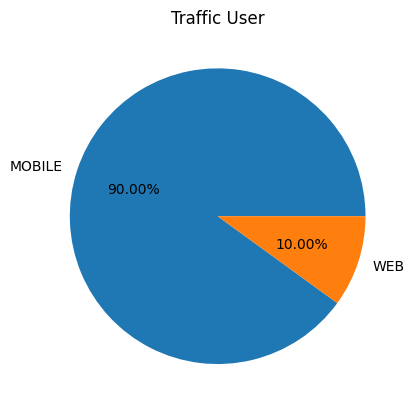

In [ ]:
plt.pie(x = df_device['traffic_source'], labels = df_device['index'], autopct = '%.2f%%')
plt.title('Traffic User')
plt.show()

In [ ]:
#The percentage portion device on booking
df[df['event_name'] == 'BOOKING']['traffic_source'].value_counts(normalize = True)

MOBILE    0.899918
WEB       0.100082
Name: traffic_source, dtype: float64

In [ ]:
#The most of booking on month
df[df['event_name'] == 'BOOKING'].groupby(['month_year'], as_index = False).agg({'event_name':'count'}).sort_values('event_name', ascending = False).head(10)

,month_year,event_name
29,05-2022,30084
23,04-2022,29237
17,03-2022,28801
36,06-2022,28587
5,01-2022,27276
73,12-2021,25677
11,02-2022,25448
43,07-2022,25162
67,11-2021,25063
61,10-2021,24675


In [ ]:
booking_YH=df[df['event_name'] == 'BOOKING'].groupby(['Hour', 'year'], as_index = False).agg({'event_name':'count'})
booking_YH

,Hour,year,event_name
0,0,2016,230
1,0,2017,1352
2,0,2018,2819
3,0,2019,4982
4,0,2020,7702
...,...,...,...
163,23,2018,3252
164,23,2019,5239
165,23,2020,8291
166,23,2021,14234


In [ ]:
traffic_YH=df.groupby(['Hour', 'year'], as_index = False).agg({'event_name':'count'})
traffic_YH = traffic_YH.rename(columns={'event_name': 'all'})
booking_YH = booking_YH.rename(columns={'event_name': 'booking'})


In [ ]:
traffic_YH

In [ ]:

merged_traffic_YH = traffic_YH.merge(booking_YH, on=['Hour', 'year'], how='outer')
merged_traffic_YH

,Hour,year,all,booking
0,0,2016,3818,230
1,0,2017,22077,1352
2,0,2018,45646,2819
3,0,2019,72232,4982
4,0,2020,107431,7702
...,...,...,...,...
163,23,2018,45329,3252
164,23,2019,72517,5239
165,23,2020,106562,8291
166,23,2021,162076,14234


In [ ]:
pickle_file_path = 'average_diff.pkl'

with open(pickle_file_path, 'wb') as f:
    pickle.dump(average_diff, f)
print(f'DataFrame saved to {pickle_file_path}')
average_diff

DataFrame saved to average_diff.pkl


,customer_id,diff,created_at,first_join_date,churn_status,cohort,cohort_index,churn_status_index
0,3,1.0,2022-06-01,2018-08-01,Not Churned,Low Risk,0,0
1,8,2.1,2022-05-01,2021-02-01,Churned,Medium Risk,1,1
2,9,1.8,2022-05-01,2021-06-01,Not Churned,Low Risk,0,0
3,11,0.0,2022-03-01,2022-03-01,Churned,New Customer,2,1
4,15,5.6,2022-01-01,2019-09-01,Churned,High Risk,3,1
...,...,...,...,...,...,...,...,...
50237,99992,1.9,2022-05-01,2020-06-01,Not Churned,Low Risk,0,0
50238,99995,1.0,2022-07-01,2020-08-01,Not Churned,Low Risk,0,0
50239,99997,0.0,2020-04-01,2020-04-01,Churned,New Customer,2,1
50240,99998,5.2,2022-01-01,2018-07-01,Churned,High Risk,3,1


In [ ]:
booking_H=df[df['event_name'] == 'BOOKING'].groupby(['Hour'], as_index = False).agg({'event_name':'count'})
booking_H

,Hour,event_name
0,0,42398
1,1,39787
2,2,37596
3,3,36151
4,4,33869
5,5,32050
6,6,30587
7,7,30003
8,8,29396
9,9,29722


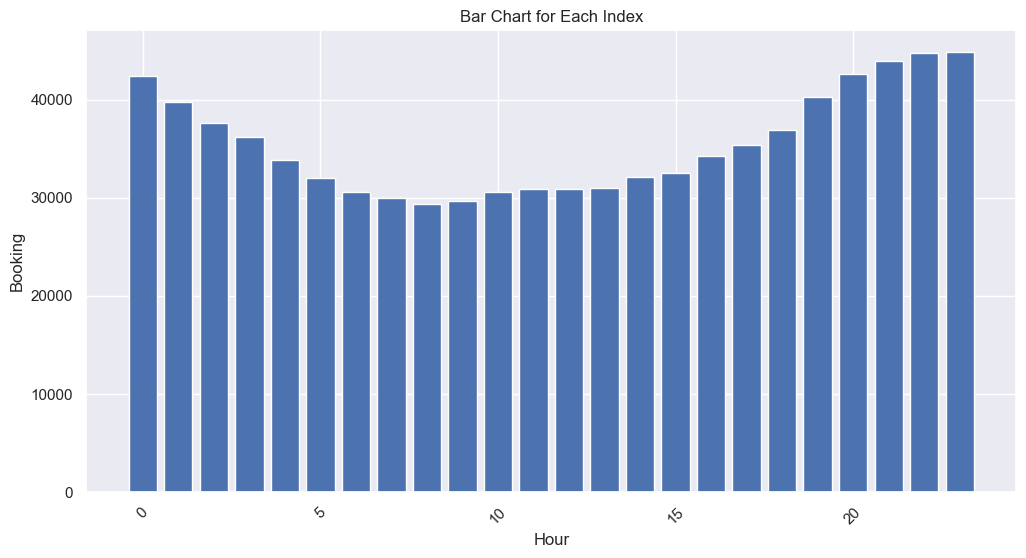

In [ ]:

values = booking_H['event_name']

plt.figure(figsize=(12, 6))
plt.bar(values.index, values)

plt.title('Bar Chart for Each hour')
plt.xlabel('Hour')
plt.ylabel('Booking')

plt.xticks(rotation=45)

plt.show()


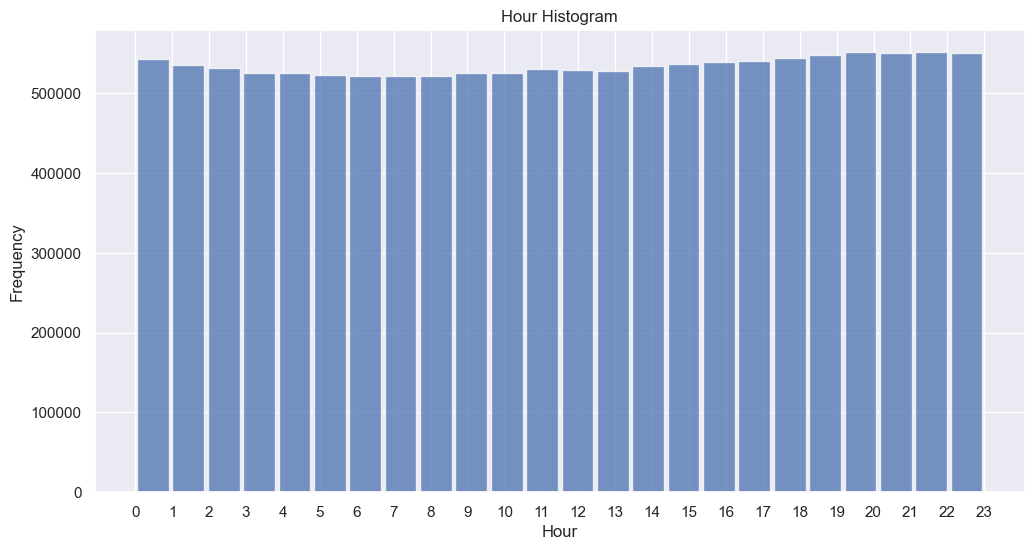

In [ ]:

plt.figure(figsize=(12, 6))
plt.hist(df['Hour'], bins=24, rwidth=0.9, alpha=0.75)
plt.title('Hour Histogram')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(24))
plt.show()



In [ ]:
df[df['event_name'] == 'BOOKING'].groupby(['month_year'], as_index = False).agg({'event_name':'count'}).sort_values('event_name', ascending = False).head(10)

,month_year,event_name
29,05-2022,30084
23,04-2022,29237
17,03-2022,28801
36,06-2022,28587
5,01-2022,27276
73,12-2021,25677
11,02-2022,25448
43,07-2022,25162
67,11-2021,25063
61,10-2021,24675


In [ ]:
# Total booking on year to year
booking_yty = df[df['event_name'] == 'BOOKING'].groupby('year', as_index = False)['event_name'].count().sort_values('year')
booking_yty

,year,event_name
0,2016,4833
1,2017,34111
2,2018,73127
3,2019,116794
4,2020,172908
5,2021,256214
6,2022,194595


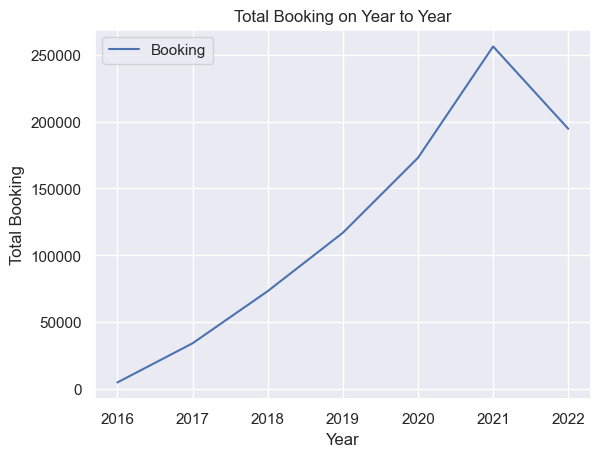

In [ ]:
plt.plot('year', 'event_name', data = booking_yty, label = 'Booking')

plt.title('Total Booking on Year to Year')
plt.xlabel('Year')
plt.ylabel('Total Booking')
plt.legend()
plt.show()

In [ ]:
traffic_user_per_year = df.groupby(['year', 'traffic_source'], as_index = False)['event_name'].count().sort_values('year', ascending = False)
traffic_user_per_year

,year,traffic_source,event_name
12,2022,MOBILE,2695376
13,2022,WEB,297895
10,2021,MOBILE,3437818
11,2021,WEB,381863
8,2020,MOBILE,2311240
9,2020,WEB,257572
6,2019,MOBILE,1568989
7,2019,WEB,175632
4,2018,MOBILE,988365
5,2018,WEB,110949


In [ ]:
year = traffic_user_per_year[['year']]
year.drop_duplicates('year', inplace = True)
year.sort_values('year', inplace = True)

C:\Users\Surface\AppData\Local\Temp\ipykernel_4832\2709172877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year.drop_duplicates('year', inplace = True)
C:\Users\Surface\AppData\Local\Temp\ipykernel_4832\2709172877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year.sort_values('year', inplace = True)


In [ ]:
mobile = traffic_user_per_year[traffic_user_per_year['traffic_source'] == 'MOBILE'][['event_name']].sort_values('event_name')
web = traffic_user_per_year[traffic_user_per_year['traffic_source'] == 'WEB'][['event_name']].sort_values('event_name')
mobile

,event_name
0,70917
2,475599
4,988365
6,1568989
8,2311240
12,2695376
10,3437818


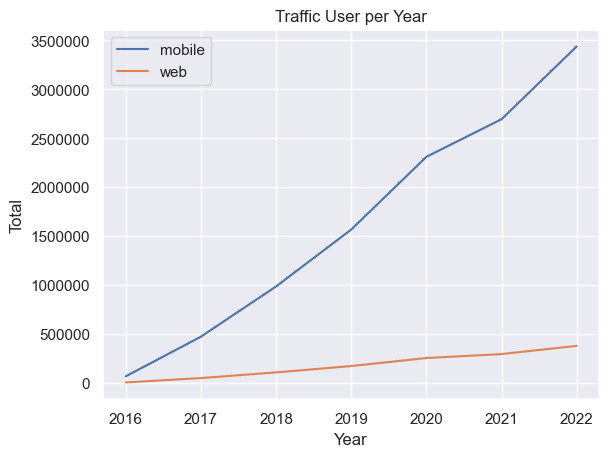

In [ ]:
plt.plot(year, mobile, label = 'mobile')
plt.plot(year, web, label = 'web')
plt.title('Traffic User per Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()

In [ ]:
search = df[df['event_name'] == 'SEARCH'][['event_metadata']]
search.set_index('event_metadata', inplace = True)
search.head()

In [ ]:
list_dict_search = []

for index, value in search.iterrows():
    list_dict_search.append(index)


In [ ]:
list_dict_search

["{'search_keywords': 'Dress Kondangan'}",
 "{'search_keywords': 'Tas Wanita'}",
 "{'search_keywords': 'Celana Panjang'}",
 "{'search_keywords': 'Kaos'}",
 "{'search_keywords': 'Sepatu'}",
 "{'search_keywords': 'Dress Kondangan'}",
 "{'search_keywords': 'Tas Kerja'}",
 "{'search_keywords': 'T-Shirt'}",
 "{'search_keywords': 'Topi'}",
 "{'search_keywords': 'Bekas'}",
 "{'search_keywords': 'T-Shirt'}",
 "{'search_keywords': 'Topi'}",
 "{'search_keywords': 'Tas Kerja'}",
 "{'search_keywords': 'Dress Kondangan'}",
 "{'search_keywords': 'Baju'}",
 "{'search_keywords': 'Thrift'}",
 "{'search_keywords': 'T-Shirt'}",
 "{'search_keywords': 'Sepatu Nike'}",
 "{'search_keywords': 'Sepatu Nike'}",
 "{'search_keywords': 'Bekas'}",
 "{'search_keywords': 'Dress Pesta'}",
 "{'search_keywords': 'Tas Wanita'}",
 "{'search_keywords': 'Bekas'}",
 "{'search_keywords': 'Kaos'}",
 "{'search_keywords': 'Baju'}",
 "{'search_keywords': 'Bekas'}",
 "{'search_keywords': 'Sepatu Adidas'}",
 "{'search_keywords': 'K

In [ ]:
dict_search_no_qoutes = []


In [ ]:
for i in list_dict_search:
    dict_search_no_qoutes.append(ast.literal_eval(i))

NameError: name 'list_dict_search' is not defined

In [ ]:
dict_search_no_qoutes

[{'search_keywords': 'Dress Kondangan'},
 {'search_keywords': 'Tas Wanita'},
 {'search_keywords': 'Celana Panjang'},
 {'search_keywords': 'Kaos'},
 {'search_keywords': 'Sepatu'},
 {'search_keywords': 'Dress Kondangan'},
 {'search_keywords': 'Tas Kerja'},
 {'search_keywords': 'T-Shirt'},
 {'search_keywords': 'Topi'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'T-Shirt'},
 {'search_keywords': 'Topi'},
 {'search_keywords': 'Tas Kerja'},
 {'search_keywords': 'Dress Kondangan'},
 {'search_keywords': 'Baju'},
 {'search_keywords': 'Thrift'},
 {'search_keywords': 'T-Shirt'},
 {'search_keywords': 'Sepatu Nike'},
 {'search_keywords': 'Sepatu Nike'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'Dress Pesta'},
 {'search_keywords': 'Tas Wanita'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'Kaos'},
 {'search_keywords': 'Baju'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'Sepatu Adidas'},
 {'search_keywords': 'Kaos'},
 {'search_keywords': 'Bekas'},
 {'search_keyword

In [ ]:
df_search = df[df['search_keywords'].notnull()]
df_search

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,date,month_year,year,Hour
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763+00:00,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,NaN,NaN,NaN,NaN,Dress Kondangan,NaN,NaN,01-09-2019 12:07:00,09-2019,2019,12
22,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 05:06:26.425431+00:00,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,NaN,NaN,NaN,NaN,Tas Wanita,NaN,NaN,09-09-2019 05:06:26,09-2019,2019,5
35,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 08:50:27.425431+00:00,a2e93548-18b5-4a79-b74f-42bbc0cf0fbd,MOBILE,NaN,NaN,NaN,NaN,Celana Panjang,NaN,NaN,09-09-2019 08:50:27,09-2019,2019,8
57,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 17:17:08.425431+00:00,bf6963cd-b681-4763-b796-ce18d3b9004f,MOBILE,NaN,NaN,NaN,NaN,Kaos,NaN,NaN,02-10-2019 17:17:08,10-2019,2019,17
59,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 21:07:33.425431+00:00,cf5d38ae-7f44-4166-9cf9-c43fb57b8f3a,MOBILE,NaN,NaN,NaN,NaN,Sepatu,NaN,NaN,02-10-2019 21:07:33,10-2019,2019,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833585,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08-01 08:03:07.737783+00:00,4e527503-27e3-4cbc-8964-23896c34fa96,WEB,NaN,NaN,NaN,NaN,Sepatu Adidas,NaN,NaN,01-08-2021 08:03:07,08-2021,2021,8
12833589,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09-22 22:44:59.674560+00:00,cbc4e8e5-aa48-40c6-8e69-07382e1d35bc,WEB,NaN,NaN,NaN,NaN,Barang Bekas,NaN,NaN,22-09-2020 22:44:59,09-2020,2020,22
12833593,f5c4bbe0-f977-45bb-af23-6ab524df7777,SEARCH,2022-04-09 21:01:31.132472+00:00,086302b8-62ba-4ce6-8cdc-9924c92176fc,MOBILE,NaN,NaN,NaN,NaN,Baju,NaN,NaN,09-04-2022 21:01:31,04-2022,2022,21
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07 04:37:53.354381+00:00,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,NaN,Bekas,NaN,NaN,07-06-2021 04:37:53,06-2021,2021,4


In [ ]:
df_search.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,date,month_year,year,Hour
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763+00:00,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,NaN,NaN,NaN,NaN,Dress Kondangan,NaN,NaN,01-09-2019 12:07:00,09-2019,2019,12
22,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 05:06:26.425431+00:00,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,NaN,NaN,NaN,NaN,Tas Wanita,NaN,NaN,09-09-2019 05:06:26,09-2019,2019,5
35,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 08:50:27.425431+00:00,a2e93548-18b5-4a79-b74f-42bbc0cf0fbd,MOBILE,NaN,NaN,NaN,NaN,Celana Panjang,NaN,NaN,09-09-2019 08:50:27,09-2019,2019,8
57,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 17:17:08.425431+00:00,bf6963cd-b681-4763-b796-ce18d3b9004f,MOBILE,NaN,NaN,NaN,NaN,Kaos,NaN,NaN,02-10-2019 17:17:08,10-2019,2019,17
59,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 21:07:33.425431+00:00,cf5d38ae-7f44-4166-9cf9-c43fb57b8f3a,MOBILE,NaN,NaN,NaN,NaN,Sepatu,NaN,NaN,02-10-2019 21:07:33,10-2019,2019,21


In [ ]:
df_search

,search_keywords,total_keyword
0,Dress Kondangan,256194
1,Tas Wanita,128790
2,Bekas,112269
3,T-Shirt,100087
4,Baju,83873
5,Kaos,83759
6,Dress Pesta,76829
7,Sepatu Nike,51578
8,Tas Kerja,38677
9,Second Hand,28429


In [ ]:
df_search = df_search.groupby('search_keywords', as_index = True).agg({'search_keywords':'count'})
df_search.rename(columns = {'search_keywords':'total_keyword'}, inplace = True)
df_search.reset_index(inplace = True)
df_search.sort_values('total_keyword', ascending = False, inplace = True, ignore_index = True)

In [ ]:
search = df['search_keywords'].value_counts(normalize = True) * 100
df_search = pd.DataFrame(search)
df_search.reset_index(inplace = True)
df_search['search_keywords'] = df_search['search_keywords'].round(1)
df_search

,index,search_keywords
0,Dress Kondangan,21.8
1,Tas Wanita,11.0
2,Bekas,9.6
3,T-Shirt,8.5
4,Baju,7.1
5,Kaos,7.1
6,Dress Pesta,6.5
7,Sepatu Nike,4.4
8,Tas Kerja,3.3
9,Second Hand,2.4


In [ ]:
search = df['search_keywords'].value_counts(normalize = True) * 100
df_search = pd.DataFrame(search)
df_search.reset_index(inplace = True)
df_search['search_keywords'] = df_search['search_keywords'].round(1)
df_search

,index,search_keywords
0,Dress Kondangan,21.8
1,Tas Wanita,11.0
2,Bekas,9.6
3,T-Shirt,8.5
4,Baju,7.1
5,Kaos,7.1
6,Dress Pesta,6.5
7,Sepatu Nike,4.4
8,Tas Kerja,3.3
9,Second Hand,2.4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


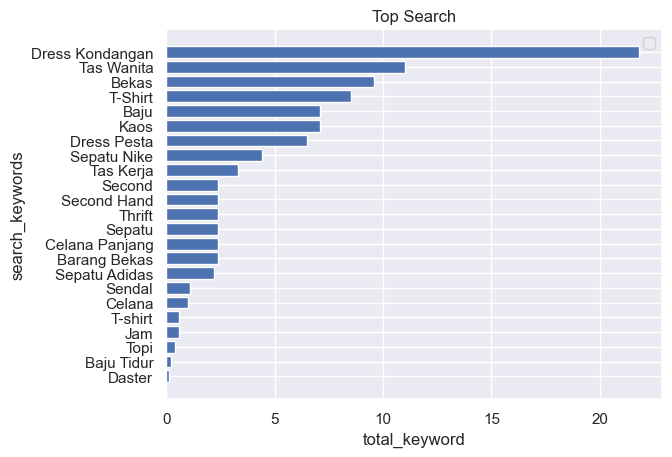

In [ ]:
plt.barh('index', 'search_keywords', data = df_search.sort_values('search_keywords', ascending = True, ignore_index = True))

plt.xlabel('total_keyword')
plt.ylabel('search_keywords')

plt.title('Top Search')

plt.legend()

plt.show()

In [ ]:
grouped_df = df.groupby(['session_id', 'search_keywords'])['event_name'].apply(lambda x: all(item in x for item in ['SEARCH', 'BOOKING'])).reset_index()

In [ ]:

grouped_df1 = grouped_df['search_keywords'].value_counts().reset_index().rename(columns={'index': 'search_keywords', 'search_keywords': 'count'})

pickle_file_path = 'serch-buy.pkl'

with open(pickle_file_path, 'wb') as f:
    pickle.dump(grouped_df1, f)
print(f'DataFrame saved to {pickle_file_path}')

grouped_df1

DataFrame saved to serch-buy.pkl


,search_keywords,count
0,Dress Kondangan,191943
1,Tas Wanita,109833
2,Bekas,97675
3,T-Shirt,85517
4,Baju,75476
5,Kaos,75352
6,Dress Pesta,69355
7,Sepatu Nike,48149
8,Tas Kerja,36778
9,Second Hand,27362


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


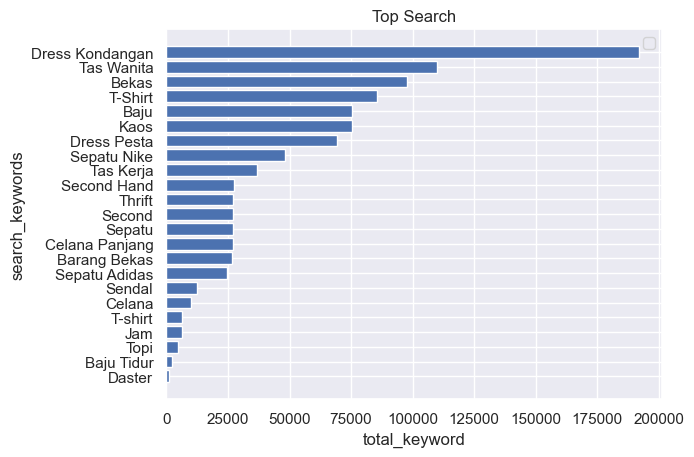

In [ ]:
plt.barh('search_keywords', 'count', data = grouped_df1.sort_values('count', ascending = True))

plt.xlabel('total_keyword')
plt.ylabel('search_keywords')

plt.title('Top Search')

plt.legend()

plt.show()

In [ ]:
['search_keywords'].value_counts()filtered_df1

Series([], Name: search_keywords, dtype: int64)

Breakout Metadata


click stram

In [ ]:
df['event_metadata'] = df['event_metadata'].fillna('{}')

In [ ]:
df.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,date,month_year,year
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,{},06-09-2019,09-2019,2019
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,{},06-09-2019,09-2019,2019
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,{},01-09-2019,09-2019,2019
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",01-09-2019,09-2019,2019
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},01-09-2019,09-2019,2019


In [ ]:
df['event_metadata'] = df['event_metadata'].apply(ast.literal_eval)


In [ ]:
df = pd.concat([df.drop(['event_metadata'], axis=1), pd.json_normalize(df['event_metadata'])], axis=1)
#This function takes a JSON-like object (a dictionary or a list of dictionaries) and converts it into a DataFrame.

Transaction

In [ ]:
transactions = dataTransactions
transactions['product_metadata'] = transactions['product_metadata'].apply(ast.literal_eval)
transaction_new = transactions.explode('product_metadata')
transaction_new = pd.concat([transaction_new.drop(['product_metadata'], axis=1), transaction_new['product_metadata'].apply(pd.Series)], axis=1)

In [ ]:
transactions = dataTransactions


In [ ]:
# transaction_new.to_csv('transaction_new.csv', index=False)

Labeling

In [ ]:
trx2 = transactions[transactions["payment_status"] == "Success"]
trx2.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [ ]:
customer = dataCustomer


In [ ]:
cust_trx= pd.merge(customer[["customer_id","first_join_date"]],trx2[["customer_id","created_at"]], on = "customer_id", how = "left")
cust_trx

,customer_id,first_join_date,created_at
0,2870,2019-07-21,NaN
1,8193,2017-07-16,NaN
2,7279,2020-08-23,2020-08-23T12:53:12.916342Z
3,7279,2020-08-23,2020-08-23T12:53:12.916342Z
4,7279,2020-08-23,2020-08-31T13:34:59.916342Z
...,...,...,...
1250788,40573,2021-07-17,2021-10-21T15:43:07.139547Z
1250789,40573,2021-07-17,2022-01-23T19:01:48.139547Z
1250790,40573,2021-07-17,2022-03-11T19:03:09.139547Z
1250791,40573,2021-07-17,2022-04-27T20:00:55.139547Z


In [ ]:
cust_trx["created_at"] = pd.to_datetime(cust_trx["created_at"])
cust_trx["first_join_date"] = pd.to_datetime(cust_trx["first_join_date"])
cust_trx

,customer_id,first_join_date,created_at
0,2870,2019-07-21,NaT
1,8193,2017-07-16,NaT
2,7279,2020-08-23,2020-08-23 12:53:12.916342+00:00
3,7279,2020-08-23,2020-08-23 12:53:12.916342+00:00
4,7279,2020-08-23,2020-08-31 13:34:59.916342+00:00
...,...,...,...
1250788,40573,2021-07-17,2021-10-21 15:43:07.139547+00:00
1250789,40573,2021-07-17,2022-01-23 19:01:48.139547+00:00
1250790,40573,2021-07-17,2022-03-11 19:03:09.139547+00:00
1250791,40573,2021-07-17,2022-04-27 20:00:55.139547+00:00


In [ ]:
cust_trx['created_at'] = cust_trx['created_at'].dt.strftime('%Y-%m')
cust_trx['first_join_date'] = cust_trx['first_join_date'].dt.strftime('%Y-%m')
cust_trx

,customer_id,first_join_date,created_at
0,2870,2019-07,NaN
1,8193,2017-07,NaN
2,7279,2020-08,2020-08
3,7279,2020-08,2020-08
4,7279,2020-08,2020-08
...,...,...,...
1250788,40573,2021-07,2021-10
1250789,40573,2021-07,2022-01
1250790,40573,2021-07,2022-03
1250791,40573,2021-07,2022-04


Customer Never Transaction¶


In [ ]:
cust_nvr_trx = cust_trx[cust_trx["created_at"].isna()]
cust_nvr_trx.shape


(49758, 3)

49758 (unique) customers have never had successful transactions, the remaining 50242 customers (unique) have had successful transactions

Customer Transaction¶


In [ ]:
cust_trx2 = cust_trx[~cust_trx["created_at"].isna()]
cust_trx2

,customer_id,first_join_date,created_at
2,7279,2020-08,2020-08
3,7279,2020-08,2020-08
4,7279,2020-08,2020-08
5,7279,2020-08,2020-09
6,7279,2020-08,2020-09
...,...,...,...
1250788,40573,2021-07,2021-10
1250789,40573,2021-07,2022-01
1250790,40573,2021-07,2022-03
1250791,40573,2021-07,2022-04


In [ ]:
# group by customer_id and created_at
cust_trx4 = cust_trx2.groupby(["customer_id","created_at"])['first_join_date'].first().reset_index()
cust_trx4

,customer_id,created_at,first_join_date
0,3,2018-08,2018-08
1,3,2018-09,2018-08
2,3,2018-10,2018-08
3,3,2018-11,2018-08
4,3,2018-12,2018-08
...,...,...,...
565536,99998,2020-07,2018-07
565537,99998,2021-01,2018-07
565538,99998,2021-07,2018-07
565539,99998,2022-01,2018-07


In [ ]:
cust_trx4["created_at"] = pd.to_datetime(cust_trx4["created_at"])

In [ ]:
size = cust_trx4.shape[0]
a = []
for i in range (size-1) :


     # if the value in the i row is in the 0th column == the value in the next row is the 0th column (the same customer)
     if cust_trx4.iloc[i,0] == cust_trx4.iloc[i+1,0] :
         # then (created_at in the next month - created_at in the previous month) divided by 1 month
         # This is to find the distance of the next successful transaction month
         a.append((cust_trx4.iloc[i+1,1] - cust_trx4.iloc[i,1])/np.timedelta64(1,'M'))
     # if the value in the i row is in the 0th column != the value in the next row is the 0th column (a different customer)
     else :
         # then (created_at in the current month - created_at in the current month) divided by 1 month
         # alias result is 0, alias it was the customer's last transaction, or it could be that he only made one transaction
         a.append((cust_trx4.iloc[i,1] - cust_trx4.iloc[i,1])/np.timedelta64(1,'M'))



In [ ]:
diff = pd.DataFrame(a, columns = ["diff"])

diff.head()


,diff
0,1.018501
1,0.985647
2,1.018501
3,0.985647
4,2.037003


In [ ]:
diff = round(diff)
diff.head()

,diff
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0


In [ ]:
cust_trx5 = pd.concat([cust_trx4, diff], axis=1)
cust_trx5["diff"] = cust_trx5["diff"].fillna(0)
cust_trx5
#here, 1 means the distance between the current month's transaction and the next transaction, 1 month apart. if 0 means no more transactions (not used), if 2.3 and so on, it means that the distance between this month's transactions and subsequent transactions is according to that number (churn)


,customer_id,created_at,first_join_date,diff
0,3,2018-08-01,2018-08,1.0
1,3,2018-09-01,2018-08,1.0
2,3,2018-10-01,2018-08,1.0
3,3,2018-11-01,2018-08,1.0
4,3,2018-12-01,2018-08,2.0
...,...,...,...,...
565536,99998,2020-07-01,2018-07,6.0
565537,99998,2021-01-01,2018-07,6.0
565538,99998,2021-07-01,2018-07,6.0
565539,99998,2022-01-01,2018-07,0.0


In [ ]:
def renovated(df) :
    if df["diff"] == 1 :
        return 0
    elif df["diff"] == 0 :
        return 2
    else :
        return 1


cust_trx5["flagging"] = cust_trx5.apply(renovated, axis =1 )

In [ ]:
cust_trx5
# this means, when the distance between the current transaction and the next one is 1 month, it will be labeled 0, so it is counted as a routine transaction. if the distance is 0 months, it will be labeled 2, and when the distance to the next transaction is above 1 month, it will be labeled 1 (churn)

,customer_id,created_at,first_join_date,diff,flagging
0,3,2018-08-01,2018-08,1.0,0
1,3,2018-09-01,2018-08,1.0,0
2,3,2018-10-01,2018-08,1.0,0
3,3,2018-11-01,2018-08,1.0,0
4,3,2018-12-01,2018-08,2.0,1
...,...,...,...,...,...
565536,99998,2020-07-01,2018-07,6.0,1
565537,99998,2021-01-01,2018-07,6.0,1
565538,99998,2021-07-01,2018-07,6.0,1
565539,99998,2022-01-01,2018-07,0.0,2


In [ ]:
final_flagging = cust_trx5[cust_trx5["flagging"] <= 1].drop(columns=['diff'])
# label 2 is dropped, which if the cust has only been in a trance so far or that is his last transaction, then he will not be included in the build for the feature

final_flagging

,customer_id,created_at,first_join_date,flagging
0,3,2018-08-01,2018-08,0
1,3,2018-09-01,2018-08,0
2,3,2018-10-01,2018-08,0
3,3,2018-11-01,2018-08,0
4,3,2018-12-01,2018-08,1
...,...,...,...,...
565534,99998,2019-07-01,2018-07,1
565535,99998,2020-01-01,2018-07,1
565536,99998,2020-07-01,2018-07,1
565537,99998,2021-01-01,2018-07,1


1 is a churn customer
0 is a customer with regular transactions

In [ ]:
final_flagging["flagging"].value_counts(normalize = True)


0    0.620106
1    0.379894
Name: flagging, dtype: float64

Feature Engineering


1. Payment Method



In [ ]:
trx_method = trx2[['created_at','customer_id','payment_method']].copy()

trx_method['created_at'] = pd.to_datetime(trx_method["created_at"])
trx_method['created_at'] = trx_method['created_at'].dt.strftime('%Y-%m')
trx_method['created_at'] = pd.to_datetime(trx_method["created_at"])

trx_method

,created_at,customer_id,payment_method
0,2018-07-01,5868,Debit Card
1,2018-07-01,4774,Credit Card
2,2018-09-01,4774,OVO
3,2018-11-01,4774,Credit Card
4,2018-12-01,4774,Credit Card
...,...,...,...
852578,2020-11-01,25121,Debit Card
852580,2021-12-01,34829,OVO
852581,2021-12-01,99645,Credit Card
852582,2019-12-01,87319,Credit Card


In [ ]:
from re import search

def renovated(df) :
    if  df['payment_method'] == 'Debit Card':
        return 'Debit Card'
    elif df['payment_method'] == 'Credit Card' :
        return 'Credit Card'
    else :
        return 'Digital Wallet'


trx_method["payment_method2"] = trx_method.apply(renovated, axis =1 )

In [ ]:
trx_method.head()


,created_at,customer_id,payment_method,payment_method2
0,2018-07-01,5868,Debit Card,Debit Card
1,2018-07-01,4774,Credit Card,Credit Card
2,2018-09-01,4774,OVO,Digital Wallet
3,2018-11-01,4774,Credit Card,Credit Card
4,2018-12-01,4774,Credit Card,Credit Card


In [ ]:
dum = pd.get_dummies(trx_method["payment_method2"])
dum

,Credit Card,Debit Card,Digital Wallet
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
852578,0,1,0
852580,0,0,1
852581,1,0,0
852582,1,0,0


In [ ]:
trx_method2 = pd.concat([trx_method, dum], axis=1)
trx_method2

,created_at,customer_id,payment_method,payment_method2,Credit Card,Debit Card,Digital Wallet
0,2018-07-01,5868,Debit Card,Debit Card,0,1,0
1,2018-07-01,4774,Credit Card,Credit Card,1,0,0
2,2018-09-01,4774,OVO,Digital Wallet,0,0,1
3,2018-11-01,4774,Credit Card,Credit Card,1,0,0
4,2018-12-01,4774,Credit Card,Credit Card,1,0,0
...,...,...,...,...,...,...,...
852578,2020-11-01,25121,Debit Card,Debit Card,0,1,0
852580,2021-12-01,34829,OVO,Digital Wallet,0,0,1
852581,2021-12-01,99645,Credit Card,Credit Card,1,0,0
852582,2019-12-01,87319,Credit Card,Credit Card,1,0,0


In [ ]:
trx_method3 = trx_method2.drop(columns=['payment_method2'], inplace=True)


In [ ]:
trx_method3 = trx_method2.groupby(["customer_id", "created_at"], as_index = False).agg({"Credit Card" : ["sum"], "Debit Card" : ["sum"], "Digital Wallet" : ["sum"]})
trx_method3.columns = list(map(''.join,trx_method3.columns.values))
trx_method3

,customer_id,created_at,Credit Cardsum,Debit Cardsum,Digital Walletsum
0,3,2018-08-01,1,0,0
1,3,2018-09-01,1,0,0
2,3,2018-10-01,1,0,0
3,3,2018-11-01,1,0,0
4,3,2018-12-01,1,0,0
...,...,...,...,...,...
565536,99998,2020-07-01,2,0,0
565537,99998,2021-01-01,1,0,0
565538,99998,2021-07-01,0,1,0
565539,99998,2022-01-01,16,0,0


In [ ]:
trx_method4 = pd.merge(final_flagging, trx_method3, how="left", on=["customer_id", "created_at"])
trx_method4

,customer_id,created_at,first_join_date,flagging,Credit Cardsum,Debit Cardsum,Digital Walletsum
0,3,2018-08-01,2018-08,0,1,0,0
1,3,2018-09-01,2018-08,0,1,0,0
2,3,2018-10-01,2018-08,0,1,0,0
3,3,2018-11-01,2018-08,0,1,0,0
4,3,2018-12-01,2018-08,1,1,0,0
...,...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1,0,0
515295,99998,2020-01-01,2018-07,1,0,1,0
515296,99998,2020-07-01,2018-07,1,2,0,0
515297,99998,2021-01-01,2018-07,1,1,0,0


In [ ]:
trx_method4.describe()


,customer_id,flagging,Credit Cardsum,Debit Cardsum,Digital Walletsum
count,515299.000000,515299.000000,515299.000000,515299.000000,515299.000000
mean,49873.821358,0.379894,0.750894,0.345432,1.046819
std,28972.061729,0.485361,1.650679,1.170148,1.884051
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,24742.000000,0.000000,0.000000,0.000000,0.000000
50%,49619.000000,0.000000,0.000000,0.000000,1.000000
75%,74951.000000,1.000000,1.000000,0.000000,1.000000
max,99998.000000,1.000000,52.000000,71.000000,54.000000


In [ ]:
bins = [-np.inf, 0, np.inf]
labels = [1,2]
trx_method4['Bin_cc'] = pd.cut(trx_method4['Credit Cardsum'], bins=bins, labels=labels)
trx_method4['Bin_dw'] = pd.cut(trx_method4['Digital Walletsum'], bins=bins, labels=labels)

In [ ]:
trx_method4

,customer_id,created_at,first_join_date,flagging,Credit Cardsum,Debit Cardsum,Digital Walletsum,Bin_cc,Bin_dw
0,3,2018-08-01,2018-08,0,1,0,0,2,1
1,3,2018-09-01,2018-08,0,1,0,0,2,1
2,3,2018-10-01,2018-08,0,1,0,0,2,1
3,3,2018-11-01,2018-08,0,1,0,0,2,1
4,3,2018-12-01,2018-08,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1,0,0,2,1
515295,99998,2020-01-01,2018-07,1,0,1,0,1,1
515296,99998,2020-07-01,2018-07,1,2,0,0,2,1
515297,99998,2021-01-01,2018-07,1,1,0,0,2,1


In [ ]:
data_iv_1 = pd.crosstab(trx_method4["Bin_dw"], trx_method4["flagging"], margins=True, margins_name="Total")
data_iv_1

flagging,0,1,Total
Bin_dw,,,
1,142666,99395,242061
2,176874,96364,273238
Total,319540,195759,515299


In [ ]:
#  create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_1["%nonevent"] = data_iv_1.apply(nonevent, axis = 1)
data_iv_1["%event"] = data_iv_1.apply(event, axis = 1)

In [ ]:
#calculate WoE and save it to new a column WoE
data_iv_1["WoE"] = np.log(data_iv_1["%event"]/data_iv_1["%nonevent"])

#  calculate IV and save it to new a column IV
data_iv_1["IV"] = data_iv_1["WoE"]*(data_iv_1["%event"] - data_iv_1["%nonevent"])
# IV = (WoE) \times (\text{%event} - \text{%nonevent})


# sum IV
data_iv_1["IV"].sum()

0.015065981283402426

2. Total Transaction



In [ ]:
total_trx = trx2[['created_at','customer_id','session_id']].copy()

total_trx['created_at'] = pd.to_datetime(total_trx["created_at"])
total_trx['created_at'] = total_trx['created_at'].dt.strftime('%Y-%m')
total_trx['created_at'] = pd.to_datetime(total_trx["created_at"])

total_trx2 = total_trx.groupby(['created_at','customer_id']).count().reset_index()
total_trx2 = total_trx2.rename(columns={'session_id' : 'total_transaction'})
total_trx2

,created_at,customer_id,total_transaction
0,2016-06-01,74089,1
1,2016-07-01,221,1
2,2016-07-01,837,1
3,2016-07-01,933,1
4,2016-07-01,1022,1
...,...,...,...
565536,2022-07-01,99936,14
565537,2022-07-01,99976,5
565538,2022-07-01,99986,1
565539,2022-07-01,99988,3


In [ ]:
total_trx3 = final_flagging.merge(total_trx2, on=['customer_id','created_at'], how='left')
total_trx3

,customer_id,created_at,first_join_date,flagging,total_transaction
0,3,2018-08-01,2018-08,0,1
1,3,2018-09-01,2018-08,0,1
2,3,2018-10-01,2018-08,0,1
3,3,2018-11-01,2018-08,0,1
4,3,2018-12-01,2018-08,1,1
...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1
515295,99998,2020-01-01,2018-07,1,1
515296,99998,2020-07-01,2018-07,1,2
515297,99998,2021-01-01,2018-07,1,1


In [ ]:
total_trx3.describe()


,customer_id,flagging,total_transaction
count,515299.000000,515299.000000,515299.000000
mean,49873.821358,0.379894,2.143146
std,28972.061729,0.485361,2.400546
min,3.000000,0.000000,1.000000
25%,24742.000000,0.000000,1.000000
50%,49619.000000,0.000000,1.000000
75%,74951.000000,1.000000,2.000000
max,99998.000000,1.000000,78.000000


In [ ]:
# define category
def func(row):
    if row <= 1:
        return 1
    elif row <= 2:
        return 2
    else:
        return 3

total_trx3['total_transactions'] = total_trx3['total_transaction'].apply(func)

In [ ]:
total_trx3['total_transactions'].value_counts()


1    311090
3    114257
2     89952
Name: total_transactions, dtype: int64

In [ ]:
total_trx3

,customer_id,created_at,first_join_date,flagging,total_transaction,total_transactions
0,3,2018-08-01,2018-08,0,1,1
1,3,2018-09-01,2018-08,0,1,1
2,3,2018-10-01,2018-08,0,1,1
3,3,2018-11-01,2018-08,0,1,1
4,3,2018-12-01,2018-08,1,1,1
...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1,1
515295,99998,2020-01-01,2018-07,1,1,1
515296,99998,2020-07-01,2018-07,1,2,2
515297,99998,2021-01-01,2018-07,1,1,1


In [ ]:
data_iv_2 = pd.crosstab(total_trx3["total_transactions"], total_trx3["flagging"], margins=True, margins_name="Total")
data_iv_2

flagging,0,1,Total
total_transactions,,,
1,150053,161037,311090
2,73477,16475,89952
3,96010,18247,114257
Total,319540,195759,515299


In [ ]:
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_2["%nonevent"] = data_iv_2.apply(nonevent, axis = 1)
data_iv_2["%event"] = data_iv_2.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_2["WoE"] = np.log(data_iv_2["%event"]/data_iv_2["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_2["IV"] = data_iv_2["WoE"]*(data_iv_2["%event"] - data_iv_2["%nonevent"])

#Let's sum IV
data_iv_2["IV"].sum()

0.5870415111434116

In [ ]:
data_iv_2

flagging,0,1,Total,%nonevent,%event,WoE,IV
total_transactions,,,,,,,
1,150053,161037,311090,0.469591,0.822629,0.560644,0.197929
2,73477,16475,89952,0.229946,0.084160,-1.005130,0.146534
3,96010,18247,114257,0.300463,0.093212,-1.170454,0.242578
Total,319540,195759,515299,1.000000,1.000000,0.000000,0.000000


3. Shipment Date Limit



In [ ]:
trx_datelimit = trx2[['created_at','customer_id','shipment_date_limit']].copy()

In [ ]:
trx_datelimit['created_at'] = pd.to_datetime(trx_datelimit["created_at"])
trx_datelimit['shipment_date_limit'] = pd.to_datetime(trx_datelimit["shipment_date_limit"])
trx_datelimit['diff_datelimit'] = trx_datelimit['shipment_date_limit'] - trx_datelimit['created_at']

In [ ]:
trx_datelimit['created_at'] = trx_datelimit['created_at'].dt.strftime('%Y-%m')
trx_datelimit['created_at'] = pd.to_datetime(trx_datelimit["created_at"])

In [ ]:
# df.to_csv('trx_datelimit.csv', index=False)

In [ ]:
# trx_datelimit = pd.read_csv('./trx_datelimit.csv', error_bad_lines=False)

In [ ]:
trx_datelimit2 = trx_datelimit.groupby(['customer_id','created_at'])(['diff_datelimit']).mean().reset_index()


In [ ]:

trx_datelimit2

In [ ]:
trx_datelimit2.describe()


,customer_id,diff_datelimit
count,1.201035e+06,1201035
mean,4.982941e+04,3 days 12:25:16.035042
std,2.899469e+04,1 days 10:40:10.838532
min,3.000000e+00,1 days 00:00:02.200453
25%,2.457300e+04,2 days 06:07:19.364837
50%,4.960700e+04,3 days 12:24:59.945925
75%,7.496400e+04,4 days 18:33:41.034416
max,9.999900e+04,6 days 00:59:59.332085


In [ ]:
from datetime import datetime, timedelta

def func(row):
    if row <= timedelta(days = 2):
        return 1
    elif row <= timedelta(days = 3):
        return 2
    elif row <= timedelta(days = 4):
        return 3
    else:
        return 4

trx_datelimit2['diff_datelimits'] = trx_datelimit2['diff_datelimit'].apply(func)

In [ ]:
trx_datelimit2['diff_datelimits'].value_counts()


4    218112
3    137761
2    119247
1     90421
Name: diff_datelimits, dtype: int64

In [ ]:
trx_datelimit3 = final_flagging.merge(trx_datelimit2, on=['customer_id','created_at'])
trx_datelimit3

,customer_id,created_at,first_join_date,flagging,diff_datelimit,diff_datelimits
0,3,2018-08-01,2018-08,0,1 days 10:14:11.973051,1
1,3,2018-09-01,2018-08,0,3 days 00:32:02.888480,3
2,3,2018-10-01,2018-08,0,5 days 10:19:03.419877,4
3,3,2018-11-01,2018-08,0,3 days 09:56:18.435177,3
4,3,2018-12-01,2018-08,1,3 days 01:42:02.245432,3
...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,3 days 01:25:27.973391,3
515295,99998,2020-01-01,2018-07,1,2 days 05:33:26.784554,2
515296,99998,2020-07-01,2018-07,1,4 days 19:30:47.205880,4
515297,99998,2021-01-01,2018-07,1,1 days 00:52:13.840735,1


In [ ]:
data_iv_3 = pd.crosstab(trx_datelimit3["diff_datelimits"], trx_datelimit3["flagging"], margins=True, margins_name="Total")
data_iv_3

flagging,0,1,Total
diff_datelimits,,,
1,44036,37578,81614
2,69706,39282,108988
3,87169,39330,126499
4,118629,79569,198198
Total,319540,195759,515299


In [ ]:
trx_datelimit3 = pd.DataFrame({
"0": ['',44036 , 69706,87169,118629],
"1": ['',37578,39282,39330,79569]})
trx_datelimit3

,0,1
0,,
1,44036,37578
2,69706,39282
3,87169,39330
4,118629,79569


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_3["%nonevent"] = data_iv_3.apply(nonevent, axis = 1)
data_iv_3["%event"] = data_iv_3.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_3["WoE"] = np.log(data_iv_3["%event"]/data_iv_3["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_3["IV"] = data_iv_3["WoE"]*(data_iv_3["%event"] - data_iv_3["%nonevent"])

#Let's sum IV
data_iv_3["IV"].sum()

0.04458391145977732

4. Shipment Fee



In [ ]:
trx_shipment = trx2[['created_at','customer_id','shipment_fee']].copy()

trx_shipment['created_at'] = pd.to_datetime(trx_shipment["created_at"])
trx_shipment['created_at'] = trx_shipment['created_at'].dt.strftime('%Y-%m')
trx_shipment['created_at'] = pd.to_datetime(trx_shipment["created_at"])

trx_shipment2 = trx_shipment.groupby(['customer_id','created_at']).sum().reset_index()
trx_shipment2

,customer_id,created_at,shipment_fee
0,3,2018-08-01,0
1,3,2018-09-01,10000
2,3,2018-10-01,10000
3,3,2018-11-01,0
4,3,2018-12-01,10000
...,...,...,...
565536,99998,2020-07-01,20000
565537,99998,2021-01-01,10000
565538,99998,2021-07-01,0
565539,99998,2022-01-01,160000


In [ ]:
trx_shipment3 = final_flagging.merge(trx_shipment2, on=['customer_id','created_at'], how='left')
trx_shipment3

,customer_id,created_at,first_join_date,flagging,shipment_fee
0,3,2018-08-01,2018-08,0,0
1,3,2018-09-01,2018-08,0,10000
2,3,2018-10-01,2018-08,0,10000
3,3,2018-11-01,2018-08,0,0
4,3,2018-12-01,2018-08,1,10000
...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,10000
515295,99998,2020-01-01,2018-07,1,0
515296,99998,2020-07-01,2018-07,1,20000
515297,99998,2021-01-01,2018-07,1,10000


In [ ]:
trx_shipment3.describe()


,customer_id,flagging,shipment_fee
count,515299.000000,515299.000000,5.152990e+05
mean,49873.821358,0.379894,1.970034e+04
std,28972.061729,0.485361,3.275937e+04
min,3.000000,0.000000,0.000000e+00
25%,24742.000000,0.000000,1.000000e+04
50%,49619.000000,0.000000,1.000000e+04
75%,74951.000000,1.000000,2.000000e+04
max,99998.000000,1.000000,1.640000e+06


In [ ]:
def func(x):
    if x <= 0:
        return 1
    elif x <= 5000:
        return 2
    elif x <= 10000:
        return 3
    elif x <= 15000:
        return 4
    else:
        return 5


trx_shipment3['shipments_fee'] = trx_shipment3['shipment_fee'].apply(func)

In [ ]:
data_iv_4 = pd.crosstab(trx_shipment3["shipments_fee"], trx_shipment3["flagging"], margins=True, margins_name="Total")
data_iv_4

flagging,0,1,Total
shipments_fee,,,
1,53195,50371,103566
2,13308,11178,24486
3,105964,88706,194670
4,19247,11126,30373
5,127826,34378,162204
Total,319540,195759,515299


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_4["%nonevent"] = data_iv_4.apply(nonevent, axis = 1)
data_iv_4["%event"] = data_iv_4.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_4["WoE"] = np.log(data_iv_4["%event"]/data_iv_4["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_4["IV"] = data_iv_4["WoE"]*(data_iv_4["%event"] - data_iv_4["%nonevent"])

#Let's sum IV
data_iv_4["IV"].sum()

0.26732525124476203

In [ ]:
trx_shipment3


,customer_id,created_at,first_join_date,flagging,shipment_fee,shipments_fee
0,3,2018-08-01,2018-08,0,0,1
1,3,2018-09-01,2018-08,0,10000,3
2,3,2018-10-01,2018-08,0,10000,3
3,3,2018-11-01,2018-08,0,0,1
4,3,2018-12-01,2018-08,1,10000,3
...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,10000,3
515295,99998,2020-01-01,2018-07,1,0,1
515296,99998,2020-07-01,2018-07,1,20000,5
515297,99998,2021-01-01,2018-07,1,10000,3


5. Traffic Source



In [ ]:
# This is because each device must have its own session. it can't be a different device
# have the same session_id

click_traffic = df.groupby(['session_id'])[['traffic_source']].first().reset_index()
click_traffic

,session_id,traffic_source
0,00001f29-3ede-4445-95f0-0178934e32ba,MOBILE
1,00003eca-954b-4150-aee1-63fc62f395cf,MOBILE
2,0000425b-ddc8-4459-a240-6ba814dac132,MOBILE
3,00005746-17ec-449c-9c5c-699a3ea9304a,MOBILE
4,0000649b-9514-4600-979b-42166a798996,MOBILE
...,...,...
895198,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,WEB
895199,ffffd3d9-79db-459e-a427-388204a7aac7,MOBILE
895200,ffffdf8e-dea1-42bc-9839-7662675c0d38,MOBILE
895201,fffff7cf-2a18-4303-9c12-aa836ae3b543,MOBILE


In [ ]:
trx_click = pd.merge(trx2[['created_at','customer_id','session_id']], click_traffic[['session_id','traffic_source']], on='session_id')

trx_click['created_at'] = pd.to_datetime(trx_click["created_at"])
trx_click['created_at'] = trx_click['created_at'].dt.strftime('%Y-%m')
trx_click['created_at'] = pd.to_datetime(trx_click["created_at"])

trx_click2 = trx_click.groupby(['customer_id','created_at','traffic_source']).count().reset_index()
trx_click2

,customer_id,created_at,traffic_source,session_id
0,3,2018-08-01,MOBILE,1
1,3,2018-09-01,MOBILE,1
2,3,2018-10-01,MOBILE,1
3,3,2018-11-01,MOBILE,1
4,3,2018-12-01,MOBILE,1
...,...,...,...,...
599993,99998,2020-07-01,MOBILE,2
599994,99998,2021-01-01,MOBILE,1
599995,99998,2021-07-01,MOBILE,1
599996,99998,2022-01-01,MOBILE,16


In [ ]:
def renovated(trx_click2) :
    if search("MOBILE", trx_click2['traffic_source']) :
        return 1
    else :
        return 2


trx_click2['traffic_source'] = trx_click2.apply(renovated, axis =1 )

In [ ]:
trx_click2['traffic_source'].value_counts()


1    522657
2     77341
Name: traffic_source, dtype: int64

In [ ]:
trx_click3 = final_flagging.merge(trx_click2, on=['customer_id','created_at'], how='left')
trx_click3

,customer_id,created_at,first_join_date,flagging,traffic_source,session_id
0,3,2018-08-01,2018-08,0,1.0,1.0
1,3,2018-09-01,2018-08,0,1.0,1.0
2,3,2018-10-01,2018-08,0,1.0,1.0
3,3,2018-11-01,2018-08,0,1.0,1.0
4,3,2018-12-01,2018-08,1,1.0,1.0
...,...,...,...,...,...,...
548141,99998,2019-07-01,2018-07,1,1.0,1.0
548142,99998,2020-01-01,2018-07,1,1.0,1.0
548143,99998,2020-07-01,2018-07,1,1.0,2.0
548144,99998,2021-01-01,2018-07,1,1.0,1.0


In [ ]:
data_iv_5 = pd.crosstab(trx_click3['traffic_source'], trx_click3["flagging"], margins=True, margins_name="Total")
data_iv_5

flagging,0,1,Total
traffic_source,,,
1.0,300535,176401,476936
2.0,51583,19626,71209
Total,352118,196027,548145


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/352118)
def event(df) :
    return (df[1]/196027)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_5["%nonevent"] = data_iv_5.apply(nonevent, axis = 1)
data_iv_5["%event"] = data_iv_5.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_5["WoE"] = np.log(data_iv_5["%event"]/data_iv_5["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_5["IV"] = data_iv_5["WoE"]*(data_iv_5["%event"] - data_iv_5["%nonevent"])

#Let's sum IV
data_iv_5["IV"].sum()

0.020104916941551188

6. Click Item Detail



In [ ]:
pickle_file_path = 'your_data.pkl'

with open(pickle_file_path, 'rb') as pickle_file:
    loaded_df = pickle.load(pickle_file)

In [ ]:
df =loaded_df 

In [ ]:
# df[df['event_name']=='ADD_PROMO']

In [ ]:
df['event_name'].value_counts()


CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: event_name, dtype: int64

In [ ]:
click_item = df[df['event_name'] == 'ITEM_DETAIL'][['session_id']]
click_item2 = trx2.iloc[:,[0,1,3]].merge(click_item, on='session_id')

click_item2['created_at'] = pd.to_datetime(click_item2["created_at"])
click_item2['created_at'] = click_item2['created_at'].dt.strftime('%Y-%m')
click_item2['created_at'] = pd.to_datetime(click_item2["created_at"])

NameError: name 'trx2' is not defined

In [ ]:
click_item2

,created_at,customer_id,session_id
0,2018-07-01,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86
1,2018-07-01,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86
2,2018-07-01,4774,2ee5ead1-f13e-4759-92df-7ff48475e970
3,2018-11-01,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4
4,2019-03-01,4774,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a
...,...,...,...
1828344,2016-09-01,16528,0a166859-a3de-4b8e-8c5c-90b58e5122f1
1828345,2020-11-01,25121,33c3bf4f-0f24-4eb8-879d-906bf7e7736a
1828346,2021-12-01,34829,954e1211-4d45-4d0b-ba84-53e80119592c
1828347,2021-12-01,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1


In [ ]:
click_item4.loc[click_item4['customer_id'] == 3]

,customer_id,created_at,first_join_date,flagging,click_detail_item
0,3,2018-08-01,2018-08,0,0.0
1,3,2018-09-01,2018-08,0,0.0
2,3,2018-10-01,2018-08,0,2.0
3,3,2018-11-01,2018-08,0,2.0
4,3,2018-12-01,2018-08,1,1.0
5,3,2019-02-01,2018-08,0,1.0
6,3,2019-03-01,2018-08,0,2.0
7,3,2019-04-01,2018-08,0,0.0
8,3,2019-05-01,2018-08,0,8.0
9,3,2019-06-01,2018-08,0,4.0


In [ ]:
click_item3 = click_item2.groupby(['customer_id','created_at']).count().reset_index()
click_item3 = click_item3.rename(columns={
    'session_id' : 'click_detail_item'
})


In [ ]:
click_item4 = final_flagging.merge(click_item3, on=['customer_id','created_at'], how='left')
click_item4 = click_item4.fillna(0)
click_item4

,customer_id,created_at,first_join_date,flagging,click_detail_item
0,3,2018-08-01,2018-08,0,0.0
1,3,2018-09-01,2018-08,0,0.0
2,3,2018-10-01,2018-08,0,2.0
3,3,2018-11-01,2018-08,0,2.0
4,3,2018-12-01,2018-08,1,1.0
...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,27.0
515295,99998,2020-01-01,2018-07,1,0.0
515296,99998,2020-07-01,2018-07,1,0.0
515297,99998,2021-01-01,2018-07,1,2.0


In [ ]:
click_item4.describe()


,customer_id,flagging,click_detail_item
count,515299.000000,515299.000000,515299.000000
mean,49873.821358,0.379894,3.282605
std,28972.061729,0.485361,7.314569
min,3.000000,0.000000,0.000000
25%,24742.000000,0.000000,0.000000
50%,49619.000000,0.000000,1.000000
75%,74951.000000,1.000000,4.000000
max,99998.000000,1.000000,420.000000


In [ ]:
# define category
def func(row):
    if row <= 0:
        return 1
    elif row <= 1:
        return 2
    elif row <= 3:
        return 3
    else:
        return 4

click_item4['click_detail_items'] = click_item4['click_detail_item'].apply(func)

In [ ]:
data_iv_6 = pd.crosstab(click_item4["click_detail_items"], click_item4["flagging"], margins=True, margins_name="Total")
data_iv_6

flagging,0,1,Total
click_detail_items,,,
1,88889,92135,181024
2,56899,44320,101219
3,67680,35363,103043
4,106072,23941,130013
Total,319540,195759,515299


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_6["%nonevent"] = data_iv_6.apply(nonevent, axis = 1)
data_iv_6["%event"] = data_iv_6.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_6["WoE"] = np.log(data_iv_6["%event"]/data_iv_6["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_6["IV"] = data_iv_6["WoE"]*(data_iv_6["%event"] - data_iv_6["%nonevent"])

#Let's sum IV
data_iv_6["IV"].sum()

0.32712838213444084

7. Total Amount



In [ ]:
trx_amount = trx2[['created_at','customer_id','total_amount']].copy()

trx_amount['created_at'] = pd.to_datetime(trx_amount["created_at"])
trx_amount['created_at'] = trx_amount['created_at'].dt.strftime('%Y-%m')
trx_amount['created_at'] = pd.to_datetime(trx_amount["created_at"])

trx_amount2 = trx_amount.groupby(['created_at','customer_id']).sum().reset_index()
trx_amount2

,created_at,customer_id,total_amount
0,2016-06-01,74089,640795
1,2016-07-01,221,467436
2,2016-07-01,837,379716
3,2016-07-01,933,237978
4,2016-07-01,1022,244862
...,...,...,...
565536,2022-07-01,99936,36570250
565537,2022-07-01,99976,3283919
565538,2022-07-01,99986,379377
565539,2022-07-01,99988,2117835


In [ ]:
trx_amount3 = final_flagging.merge(trx_amount2, on=['customer_id','created_at'], how='left')
trx_amount3

,customer_id,created_at,first_join_date,flagging,total_amount
0,3,2018-08-01,2018-08,0,826597
1,3,2018-09-01,2018-08,0,163784
2,3,2018-10-01,2018-08,0,124932
3,3,2018-11-01,2018-08,0,247902
4,3,2018-12-01,2018-08,1,181237
...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,384029
515295,99998,2020-01-01,2018-07,1,216338
515296,99998,2020-07-01,2018-07,1,1068674
515297,99998,2021-01-01,2018-07,1,366178


In [ ]:
trx_amount3.describe()

,customer_id,flagging,total_amount
count,515299.000000,515299.000000,5.152990e+05
mean,49873.821358,0.379894,2.539591e+06
std,28972.061729,0.485361,1.153880e+07
min,3.000000,0.000000,1.520300e+04
25%,24742.000000,0.000000,2.375340e+05
50%,49619.000000,0.000000,4.144470e+05
75%,74951.000000,1.000000,1.166800e+06
max,99998.000000,1.000000,8.931705e+08


In [ ]:
def func(row):
    if row <= 2.371495e+05:
        return 1
    elif row <= 4.019420e+05:
        return 2
    elif row <= 8.667350e+05:
        return 3
    else:
        return 4

trx_amount3['total_amount_paid'] = trx_amount3['total_amount'].apply(func)

In [ ]:
data_iv_7 = pd.crosstab(trx_amount3["total_amount_paid"], trx_amount3["flagging"], margins=True, margins_name="Total")
data_iv_7

flagging,0,1,Total
total_amount_paid,,,
1,62418,65992,128410
2,64751,58761,123512
3,73795,30858,104653
4,118576,40148,158724
Total,319540,195759,515299


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_7["%nonevent"] = data_iv_7.apply(nonevent, axis = 1)
data_iv_7["%event"] = data_iv_7.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_7["WoE"] = np.log(data_iv_7["%event"]/data_iv_7["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_7["IV"] = data_iv_7["WoE"]*(data_iv_7["%event"] - data_iv_7["%nonevent"])

#Let's sum IV
data_iv_7["IV"].sum()

0.24211282741868323

8. Promo Amount



In [ ]:
trx2


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852578,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688,42915,1,277688
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [ ]:
trx_promo = trx2[['created_at','customer_id','promo_amount']].copy()

trx_promo['created_at'] = pd.to_datetime(trx_promo["created_at"])
trx_promo['created_at'] = trx_promo['created_at'].dt.strftime('%Y-%m')
trx_promo['created_at'] = pd.to_datetime(trx_promo["created_at"])

trx_promo2_first = trx_promo.groupby(['customer_id','created_at'])[['promo_amount']].sum().reset_index()
trx_promo2_first

,customer_id,created_at,promo_amount
0,3,2018-08-01,8073
1,3,2018-09-01,0
2,3,2018-10-01,8828
3,3,2018-11-01,3415
4,3,2018-12-01,2645
...,...,...,...
565536,99998,2020-07-01,0
565537,99998,2021-01-01,8569
565538,99998,2021-07-01,0
565539,99998,2022-01-01,31264


In [ ]:
trx_promo2 = trx_promo2_first.groupby(['customer_id','created_at'])[['promo_amount']].sum().reset_index()
trx_promo2

,customer_id,created_at,promo_amount
0,3,2018-08-01,8073
1,3,2018-09-01,0
2,3,2018-10-01,8828
3,3,2018-11-01,3415
4,3,2018-12-01,2645
...,...,...,...
565536,99998,2020-07-01,0
565537,99998,2021-01-01,8569
565538,99998,2021-07-01,0
565539,99998,2022-01-01,31264


In [ ]:
trx_promo3 = final_flagging.merge(trx_promo2, on=['customer_id','created_at'], how='left')
trx_promo3 = trx_promo3.fillna(0)
trx_promo3

,customer_id,created_at,first_join_date,flagging,promo_amount
0,3,2018-08-01,2018-08,0,8073
1,3,2018-09-01,2018-08,0,0
2,3,2018-10-01,2018-08,0,8828
3,3,2018-11-01,2018-08,0,3415
4,3,2018-12-01,2018-08,1,2645
...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,5670
515295,99998,2020-01-01,2018-07,1,4912
515296,99998,2020-07-01,2018-07,1,0
515297,99998,2021-01-01,2018-07,1,8569


In [ ]:
trx_promo3.describe()


,customer_id,flagging,promo_amount
count,515299.000000,515299.000000,515299.000000
mean,49873.821358,0.379894,4438.318312
std,28972.061729,0.485361,9458.836181
min,3.000000,0.000000,0.000000
25%,24742.000000,0.000000,0.000000
50%,49619.000000,0.000000,0.000000
75%,74951.000000,1.000000,5805.000000
max,99998.000000,1.000000,353718.000000


In [ ]:
def func(x):
    if x == 0:
        return 1
    elif x <= 5150:
        return 2
    else:
        return 3


trx_promo3['promo_amount_used'] = trx_promo3['promo_amount'].apply(func)
trx_promo3

,customer_id,created_at,first_join_date,flagging,promo_amount,promo_amount_used
0,3,2018-08-01,2018-08,0,8073,3
1,3,2018-09-01,2018-08,0,0,1
2,3,2018-10-01,2018-08,0,8828,3
3,3,2018-11-01,2018-08,0,3415,2
4,3,2018-12-01,2018-08,1,2645,2
...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,5670,3
515295,99998,2020-01-01,2018-07,1,4912,2
515296,99998,2020-07-01,2018-07,1,0,1
515297,99998,2021-01-01,2018-07,1,8569,3


In [ ]:
data_iv_8 = pd.crosstab(trx_promo3["promo_amount_used"], trx_promo3["flagging"], margins=True, margins_name="Total")
data_iv_8

flagging,0,1,Total
promo_amount_used,,,
1,154835,115058,269893
2,60940,37618,98558
3,103765,43083,146848
Total,319540,195759,515299


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_8["%nonevent"] = data_iv_8.apply(nonevent, axis = 1)
data_iv_8["%event"] = data_iv_8.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_8["WoE"] = np.log(data_iv_8["%event"]/data_iv_8["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_8["IV"] = data_iv_8["WoE"]*(data_iv_8["%event"] - data_iv_8["%nonevent"])

#Let's sum IV
data_iv_8["IV"].sum()

0.060645110373155245

9. Promo Used Count



In [ ]:
# how many times does he/she use the promo every month (see by order)
promo_used = trx_promo2_first.copy()
promo_used['promo_count'] = promo_used['promo_amount'].apply(lambda x : 1 if x > 0 else 0)
promo_used

,customer_id,created_at,promo_amount,promo_count
0,3,2018-08-01,8073,1
1,3,2018-09-01,0,0
2,3,2018-10-01,8828,1
3,3,2018-11-01,3415,1
4,3,2018-12-01,2645,1
...,...,...,...,...
565536,99998,2020-07-01,0,0
565537,99998,2021-01-01,8569,1
565538,99998,2021-07-01,0,0
565539,99998,2022-01-01,31264,1


In [ ]:
promo_used2 = promo_used.groupby(['customer_id','created_at'])[['promo_amount','promo_count']].sum().reset_index()
promo_used2

,customer_id,created_at,promo_amount,promo_count
0,3,2018-08-01,8073,1
1,3,2018-09-01,0,0
2,3,2018-10-01,8828,1
3,3,2018-11-01,3415,1
4,3,2018-12-01,2645,1
...,...,...,...,...
565536,99998,2020-07-01,0,0
565537,99998,2021-01-01,8569,1
565538,99998,2021-07-01,0,0
565539,99998,2022-01-01,31264,1


In [ ]:
promo_used3 = final_flagging.merge(promo_used2, on=['customer_id','created_at'], how='left')
promo_used3

,customer_id,created_at,first_join_date,flagging,promo_amount,promo_count
0,3,2018-08-01,2018-08,0,8073,1
1,3,2018-09-01,2018-08,0,0,0
2,3,2018-10-01,2018-08,0,8828,1
3,3,2018-11-01,2018-08,0,3415,1
4,3,2018-12-01,2018-08,1,2645,1
...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,5670,1
515295,99998,2020-01-01,2018-07,1,4912,1
515296,99998,2020-07-01,2018-07,1,0,0
515297,99998,2021-01-01,2018-07,1,8569,1


In [ ]:
promo_used3.describe()


,customer_id,flagging,promo_amount,promo_count
count,515299.000000,515299.000000,515299.000000,515299.000000
mean,49873.821358,0.379894,4438.318312,0.476240
std,28972.061729,0.485361,9458.836181,0.499436
min,3.000000,0.000000,0.000000,0.000000
25%,24742.000000,0.000000,0.000000,0.000000
50%,49619.000000,0.000000,0.000000,0.000000
75%,74951.000000,1.000000,5805.000000,1.000000
max,99998.000000,1.000000,353718.000000,1.000000


In [ ]:
def func(row):
    if row == 0:
        return 1
    elif row == 1:
        return 2
    else:
        return 3

promo_used3['promo_used'] = promo_used3['promo_count'].apply(func)

In [ ]:
data_iv_9 = pd.crosstab(promo_used3["promo_used"], promo_used3["flagging"], margins=True, margins_name="Total")
data_iv_9

flagging,0,1,Total
promo_used,,,
1,154835,115058,269893
2,164705,80701,245406
Total,319540,195759,515299


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_9["%nonevent"] = data_iv_9.apply(nonevent, axis = 1)
data_iv_9["%event"] = data_iv_9.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_9["WoE"] = np.log(data_iv_9["%event"]/data_iv_9["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_9["IV"] = data_iv_9["WoE"]*(data_iv_9["%event"] - data_iv_9["%nonevent"])

#Let's sum IV
data_iv_9["IV"].sum()

0.04297978544992914

10. Search Frequent



In [ ]:
click_search = df[df['event_name'] == 'SEARCH'][['session_id']]
click_search2 = trx2.iloc[:,[0,1,3]].merge(click_search, on='session_id')

click_search2['created_at'] = pd.to_datetime(click_search2["created_at"])
click_search2['created_at'] = click_search2['created_at'].dt.strftime('%Y-%m')
click_search2['created_at'] = pd.to_datetime(click_search2["created_at"])

In [ ]:
click_search3 = click_search2.groupby(['customer_id','created_at']).count().reset_index()
click_search3 = click_search3.rename(columns={
    'session_id' : 'click_search'
})
click_search3

,customer_id,created_at,click_search
0,3,2018-10-01,1
1,3,2018-11-01,1
2,3,2018-12-01,1
3,3,2019-02-01,1
4,3,2019-03-01,1
...,...,...,...
338072,99998,2019-07-01,9
338073,99998,2020-07-01,2
338074,99998,2021-07-01,1
338075,99998,2022-01-01,16


In [ ]:
click_search4 = final_flagging.merge(click_search3, on=['customer_id','created_at'], how='left')
click_search4 = click_search4.fillna(0)
click_search4

,customer_id,created_at,first_join_date,flagging,click_search
0,3,2018-08-01,2018-08,0,0.0
1,3,2018-09-01,2018-08,0,0.0
2,3,2018-10-01,2018-08,0,1.0
3,3,2018-11-01,2018-08,0,1.0
4,3,2018-12-01,2018-08,1,1.0
...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,9.0
515295,99998,2020-01-01,2018-07,1,0.0
515296,99998,2020-07-01,2018-07,1,2.0
515297,99998,2021-01-01,2018-07,1,0.0


In [ ]:
click_search4.describe()

,customer_id,flagging,click_search
count,515299.000000,515299.000000,515299.00000
mean,49873.821358,0.379894,2.94502
std,28972.061729,0.485361,6.68540
min,3.000000,0.000000,0.00000
25%,24742.000000,0.000000,0.00000
50%,49619.000000,0.000000,1.00000
75%,74951.000000,1.000000,3.00000
max,99998.000000,1.000000,374.00000


In [ ]:
def func(row):
    if row <= 1:
        return 1
    else:
        return 2

click_search4['search_count'] = click_search4['click_search'].apply(func)

In [ ]:
click_search4['search_count'].value_counts()


1    301562
2    213737
Name: search_count, dtype: int64

In [ ]:
data_iv_10 = pd.crosstab(click_search4["search_count"], click_search4["flagging"], margins=True, margins_name="Total")
data_iv_10

flagging,0,1,Total
search_count,,,
1,153011,148551,301562
2,166529,47208,213737
Total,319540,195759,515299


In [ ]:
# Let's create function nonevent & event
def nonevent(df) :
    return (df[0]/319540)
def event(df) :
    return (df[1]/195759)

# Apply function nonevent & event and save it to new columns %nonevent & %event
data_iv_10["%nonevent"] = data_iv_10.apply(nonevent, axis = 1)
data_iv_10["%event"] = data_iv_10.apply(event, axis = 1)

In [ ]:
#Let's calculate WoE and save it to new a column WoE
data_iv_10["WoE"] = np.log(data_iv_10["%event"]/data_iv_10["%nonevent"])

# Let's calculate IV and save it to new a column IV
data_iv_10["IV"] = data_iv_10["WoE"]*(data_iv_10["%event"] - data_iv_10["%nonevent"])

#Let's sum IV
data_iv_10["IV"].sum()

0.344685191747398

In [ ]:
trx_method4

,customer_id,created_at,first_join_date,flagging,Credit Cardsum,Debit Cardsum,Digital Walletsum,Bin_cc,Bin_dw
0,3,2018-08-01,2018-08,0,1,0,0,2,1
1,3,2018-09-01,2018-08,0,1,0,0,2,1
2,3,2018-10-01,2018-08,0,1,0,0,2,1
3,3,2018-11-01,2018-08,0,1,0,0,2,1
4,3,2018-12-01,2018-08,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1,0,0,2,1
515295,99998,2020-01-01,2018-07,1,0,1,0,1,1
515296,99998,2020-07-01,2018-07,1,2,0,0,2,1
515297,99998,2021-01-01,2018-07,1,1,0,0,2,1


Feature Selection¶


In [ ]:
trx_method5 = trx_method4[["customer_id", 'created_at', 'flagging', 'Bin_cc', 'Bin_dw']]
trx_method5

,customer_id,created_at,flagging,Bin_cc,Bin_dw
0,3,2018-08-01,0,2,1
1,3,2018-09-01,0,2,1
2,3,2018-10-01,0,2,1
3,3,2018-11-01,0,2,1
4,3,2018-12-01,1,2,1
...,...,...,...,...,...
515294,99998,2019-07-01,1,2,1
515295,99998,2020-01-01,1,1,1
515296,99998,2020-07-01,1,2,1
515297,99998,2021-01-01,1,2,1


In [ ]:
feature_all = trx_promo3.merge(trx_shipment3.drop(columns=['shipment_fee']), on=['customer_id','created_at','first_join_date','flagging'])
# feature_all = feature_all.merge(trx_datelimit3.drop(columns=['diff_datelimit']), on=['customer_id','created_at','first_join_date','flagging'])
feature_all = feature_all.merge(click_item4.drop(columns=['click_detail_item']), on=['customer_id','created_at','first_join_date','flagging'])
feature_all = feature_all.merge(trx_method5.drop(columns=['Bin_cc', 'Bin_dw']), on=['customer_id','created_at','flagging'])
feature_all = feature_all.merge(total_trx3.drop(columns=['total_transaction']), on=['customer_id','created_at','first_join_date','flagging'])
feature_all = feature_all.merge(trx_amount3.drop(columns=['total_amount']), on=['customer_id','created_at','first_join_date','flagging'])
feature_all = feature_all.merge(promo_used3.drop(columns=['promo_amount','promo_count']), on=['customer_id','created_at','first_join_date','flagging'])
feature_all = feature_all.merge(click_search4.drop(columns=['click_search']), on=['customer_id','created_at','first_join_date','flagging'])
feature_all = feature_all.merge(trx_click3.drop(columns=['traffic_source']), on=['customer_id','created_at','first_join_date','flagging'])

feature_all = feature_all.fillna(0)
feature_all

,customer_id,created_at,first_join_date,flagging,promo_amount,promo_amount_used,shipments_fee,click_detail_items,total_transactions,total_amount_paid,promo_used,search_count,session_id
0,3,2018-08-01,2018-08,0,8073,3,1,1,1,3,2,1,1.0
1,3,2018-09-01,2018-08,0,0,1,3,1,1,1,1,1,1.0
2,3,2018-10-01,2018-08,0,8828,3,3,3,1,1,2,1,1.0
3,3,2018-11-01,2018-08,0,3415,2,1,3,1,2,2,1,1.0
4,3,2018-12-01,2018-08,1,2645,2,3,2,1,1,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548141,99998,2019-07-01,2018-07,1,5670,3,3,4,1,2,2,2,1.0
548142,99998,2020-01-01,2018-07,1,4912,2,1,1,1,1,2,1,1.0
548143,99998,2020-07-01,2018-07,1,0,1,5,1,2,4,1,2,2.0
548144,99998,2021-01-01,2018-07,1,8569,3,3,3,1,2,2,1,1.0


In [ ]:
X = feature_all.iloc[:,4:]
y = feature_all[["flagging"]]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print("  training: ", X_train.shape)
print("  testing: ", X_test.shape)

  training:  (383702, 9)
  testing:  (164444, 9)


In [ ]:
def calc_iv(df, feature, target, pr=False):

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

In [ ]:
iv_df = X_train.copy()
iv_df["target"] = y_train

features = iv_df.columns[:-1].tolist()

iv_list = []
for feature in features:
    iv, data = calc_iv(iv_df, feature, 'target')
    iv_list.append(round(iv,6))

woe_df = pd.DataFrame(np.column_stack([features, iv_list]),
                      columns=['Feature', 'iv'])
woe_df

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Feature,iv
0,promo_amount,0.166564
1,promo_amount_used,0.081808
2,shipments_fee,0.337991
3,click_detail_items,0.39398
4,total_transactions,0.726829
5,total_amount_paid,0.309285
6,promo_used,0.059868
7,search_count,0.405071
8,session_id,0.404973


Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [ ]:
!pip3 install xgboost


     --------------------------------------- 70.9/70.9 MB 14.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip3 install lightgbm
!pip3 install catboost


     ---------------------------------------- 1.3/1.3 MB 13.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------- 101.0/101.0 MB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import xgboost as xgb
print(xgb.__version__)


1.7.6


In [ ]:
conda install -c anaconda py-xgboost


Solving environment: ...working... done

## Package Plan ##

  environment location: c:\ProgramData\Anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be UPDATED:

  certifi            pkgs/main/noarch::certifi-2020.6.20-p~ --> anaconda/win-64::certifi-2022.12.7-py37haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.05.30~ --> anaconda::ca-certificates-2023.01.10-haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base conda




In [ ]:
selected_features = ['promo_amount','shipments_fee','click_detail_items','total_transactions','total_amount_paid','search_count']

In [ ]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16),
    "XGBoost" : XGBClassifier(max_depth=12,
                              n_estimators=250,
                              min_child_weight=8,
                              subsample=0.8,
                              learning_rate =0.02,
                              seed=42),
    "CatBoost" : CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)
}

In [ ]:
X = cust_trx5[['customer_id',	'created_at'	,'first_join_date',	'diff']]
y = cust_trx5['flagging']
x_2 = pd.get_dummies(X, columns = [
    	'created_at'	,'first_join_date',	'diff'
    ])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_2, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy:  1.0
F1-Score:  1.0
Accuracy:  1.0
F1-Score:  1.0


[Text(0.6, 0.8333333333333334, 'diff_1.0 <= 0.5\ngini = 0.554\nsamples = 452432\nvalue = [255308, 156790, 40334]'),
 Text(0.4, 0.5, 'diff_0.0 <= 0.5\ngini = 0.325\nsamples = 197124\nvalue = [0, 156790, 40334]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 156790\nvalue = [0, 156790, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 40334\nvalue = [0, 0, 40334]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 255308\nvalue = [255308, 0, 0]')]

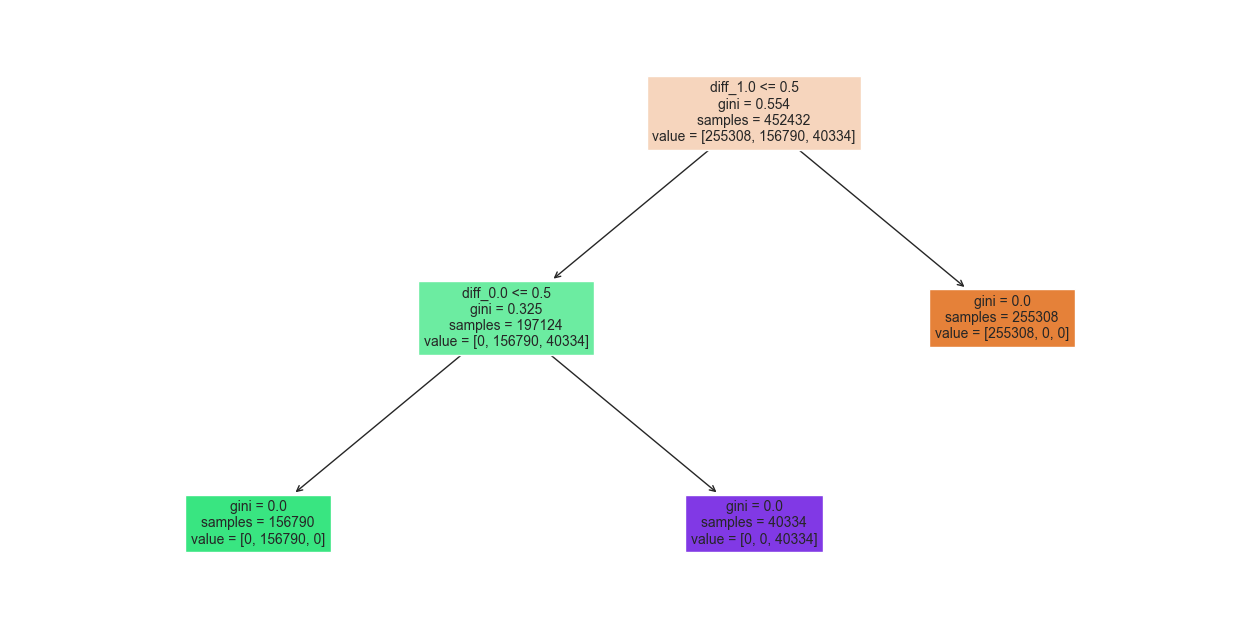

In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_hat_dt = dt.predict(X_test)
f1_sc_dt = f1_score(y_test, y_hat_dt, average='micro')
acc_dt = accuracy_score(y_test, y_hat_dt)
print('Accuracy: ', acc_dt)
print('F1-Score: ', f1_sc_dt)

dt = DecisionTreeClassifier(min_samples_leaf = 110,
                            max_depth = 4,
                            max_leaf_nodes = 6
                            ).fit(X_train, y_train)
y_hat_dt = dt.predict(X_test)
f1_sc_dt = f1_score(y_test, y_hat_dt,average='micro')
acc_dt = accuracy_score(y_test, y_hat_dt)
print('Accuracy: ', acc_dt)
print('F1-Score: ', f1_sc_dt)

plt.subplots(figsize=(16, 8))
tree.plot_tree(dt, 
               feature_names = x_2.columns, 
               #class_names = y_data['IncidentGroup'], 
               fontsize=10, filled=True)

In [ ]:
for key, classifier in classifiers.items():
    classifier.fit(X_train[selected_features], y_train)
    y_predict = classifier.predict(X_test[selected_features])

    yproba = classifier.predict_proba(X_test[selected_features])[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    conf_matrix = confusion_matrix(y_test,y_predict)

    result_table = result_table.append({'classifiers':key,
                                        'accuracy':accuracy_score(y_test, y_predict),
                                        'presicion':precision_score(y_test, y_predict, average='weighted'),
                                        'recall':recall_score(y_test, y_predict, average='weighted'),
                                        'f1_score':f1_score(y_test, y_predict, average='weighted'),
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc
                                         }, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

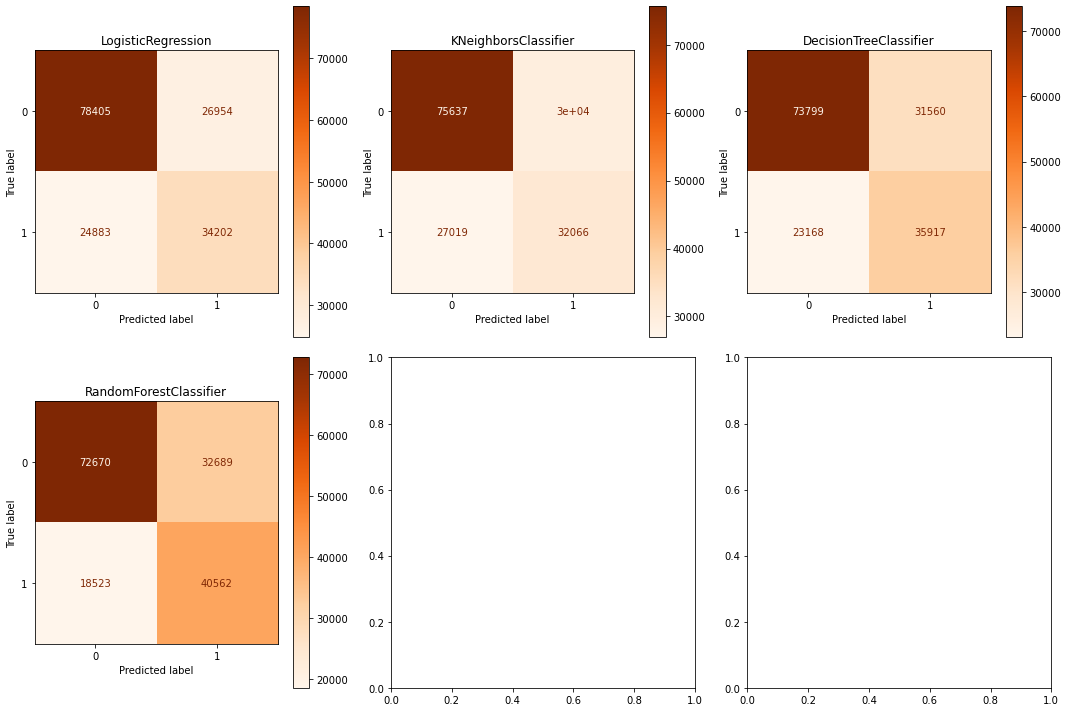

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(list(classifiers.values()), axes.flatten()):
    plot_confusion_matrix(cls,
                          X_test[selected_features],
                          y_test,
                          ax=ax,
                          cmap='Oranges')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()

In [ ]:
result_table.iloc[:,:4]


,accuracy,presicion,recall,f1_score
classifiers,,,,
LogisticRegression,0.684774,0.687291,0.684774,0.685924
KNeighbors,0.654952,0.658533,0.654952,0.656569
DecisionTree,0.667194,0.678869,0.667194,0.671325
RandomForest,0.688575,0.709520,0.688575,0.694021


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "newton-cg", max_iter = 1000, C = 3.2)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_log))

c:\Users\Surface\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Surface\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Surface\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

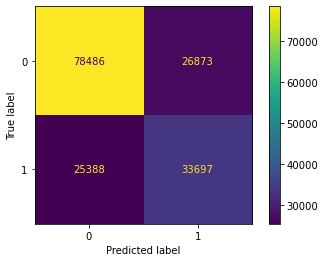

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

In [ ]:
# stacked bar chart on search_count.pk1

In [ ]:
# use average_diff or run
# Calculate the average diff for each customer
cust_trx5['first_join_date'] = pd.to_datetime(cust_trx5['first_join_date'])
cust_trx5['join_year'] = cust_trx5['first_join_date'].dt.year
average_diff = cust_trx5.groupby('customer_id').agg({'diff': 'mean', 'created_at': 'last', 'first_join_date': 'first'}).reset_index()
threshold = 2.0  
average_diff['churn_status'] = average_diff['diff'].apply(lambda x: 'Churned' if x > threshold else 'Not Churned')
average_diff['diff'] = average_diff['diff'].round(1)
average_diff['churn_status'] = average_diff.apply(lambda row: 'Churned' if row['diff'] == 0.0 else row['churn_status'], axis=1)
average_diff
average_diff['cohort'] = None
average_diff['cohort'] = average_diff['diff'].apply(lambda x:
    'High Risk' if x >= 3.0 else
    'Medium Risk' if 2.0 <= x < 3.0 else
    'Low Risk' if 1.0 <= x < 2.0 else
    'New Customer'
)
average_diff

In [ ]:
start_year = 2016
end_year = 2022

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Year', 'Event', 'Percentage'])

# Iterate through each year in the specified range
for year in range(start_year, end_year + 1):
    # Filter the DataFrame for the current year
    filtered_df = df[df['year'] == year]
    
    # Calculate the percentage distribution of event_name values for the current year
    percentage_distribution = filtered_df['event_name'].value_counts(normalize=True) * 100
    
    # Append each event and its percentage distribution for the current year to the result DataFrame
    for event, percentage in percentage_distribution.items():
        result_df = result_df.append({'Year': year, 'Event': event, 'Percentage': percentage}, ignore_index=True)
result_df

C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\955636244.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\955636244.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\955636244.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\955636244.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Surface\AppData\Local\Temp\ipykernel_3924\955636244.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,Year,Event,Percentage
0,2016,CLICK,18.938073
1,2016,HOMEPAGE,18.797847
2,2016,ADD_TO_CART,18.316531
3,2016,SCROLL,12.011420
4,2016,ITEM_DETAIL,9.191743
...,...,...,...
58,2022,ITEM_DETAIL,10.549763
59,2022,SEARCH,9.927233
60,2022,BOOKING,6.501082
61,2022,PROMO_PAGE,4.582078


In [1]:
from dash import Input, Output, dash , dcc, html ,State
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
import dash
import dash.dependencies as dd
import base64
import networkx as nx
import base64
import os
import pickle
import pandas as pd


pickle_files = ['df_device.pkl', 'traffic_YH.pkl', 'click.pkl', 'average_diff.pkl', 'cust_trx5.pkl', 'search_count.pkl', 'df_weights.pkl']
dataframes = {}

for pickle_file in pickle_files:
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data)
        # Use the file name (without extension) as the dataframe key
        dataframe_name = pickle_file.split('.')[0]
        dataframes[dataframe_name] = df
df_device = dataframes['df_device']
traffic_YH = dataframes['traffic_YH']
click = dataframes['click']
average_diff = dataframes['average_diff']
cust_trx5 = dataframes['cust_trx5']
search_count = dataframes['search_count']
df_weights = dataframes['df_weights']

In [2]:

app = dash.Dash(__name__, suppress_callback_exceptions=True)
# Function to generate the traffic page layout
def generate_traffic_page():
    return html.Div([
        html.H1("Stacked Bar Chart for Traffic Events"),

        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in traffic_YH['year'].unique()],
            value=traffic_YH['year'].max(),
            multi=False
        ),

        dcc.Graph(id='stacked-bar-chart')
    ])
# Function to generate the traffic page layout
def generate_traffic_source():
    return html.Div([
        html.H1("Pie Chart for Traffic Sources"),
        dcc.Graph(id='pie-chart-traffic')
    ])
    
# Define the click page layout
def generate_click_page():
    return html.Div([
        html.H1("Pie Chart for Event Percentage (Click)"),

        dcc.Dropdown(
            id='year-dropdown-click',
            options=[{'label': year, 'value': year} for year in click['Year'].unique()],
            multi=True,
            value=[2022]  # Default selection
        ),

        dcc.Graph(id='pie-chart-click')
    ])

# Callback to update the pie chart (Click page) based on selected years
@app.callback(
    Output('pie-chart-click', 'figure'),
    Input('year-dropdown-click', 'value')
)
def update_pie_chart_click(selected_years):
    # Filter the DataFrame based on selected years
    filtered_df = click[click['Year'].isin(selected_years)]

    # Sum the percentages for the selected years
    event_totals = filtered_df.groupby('Event')['Percentage'].sum().reset_index()

    # Create the Pie Chart
    fig = px.pie(event_totals, names='Event', values='Percentage', title='Event Percentage Distribution (Click)')

    return fig

# Callback to update the stacked bar chart based on the selected year
@app.callback(
    Output('stacked-bar-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_stacked_bar_chart(selected_year):
    filtered_df = traffic_YH[traffic_YH['year'] == selected_year]

    fig = px.bar(filtered_df, x='Hour', y=['all', 'booking'],
                 title=f"Stacked Bar Chart for Traffic Events in {selected_year}",
                 labels={'Hour': 'Hour', 'value': 'Count'},
                 height=400)

    fig.update_layout(barmode='stack')

    return fig
# Callback to update the traffic pie chart
@app.callback(
    Output('pie-chart-traffic', 'figure'),
    Input('pie-chart-traffic', 'relayoutData')
)
def update_pie_chart_traffic(relayout_data):
    fig = px.pie(df_device, values='traffic_source', names='index', title='Traffic Sources')
    return fig
def generate_churn_page():
    return html.Div([
        html.H1("Churn Page"),
        dcc.Tabs(id="tabs", value='tab-1', children=[
            dcc.Tab(label='Sankey Diagram', value='tab-1'),
            dcc.Tab(label='Heatmap', value='tab-2'),
            dcc.Tab(label='Churn Rate Over Time', value='tab-3'),
            dcc.Tab(label='Churn Distribution Histogram', value='tab-4'),
        ]),
        html.Div(id='tab-content'),
        # Add the RangeSlider for x-axis range selection
        dcc.RangeSlider(
            id='x-axis-range-slider',
            min=0,
            max=50,
            step=0.1,
            value=[0, 15],
            marks={0: '0', 50: '50'},
        ),
    ])
# Callback to render the selected tab content
@app.callback(
    Output('tab-content', 'children'),
    Input('tabs', 'value')
)
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([
            html.H1("Customer Cohort Sankey Diagram"),
            dcc.Graph(id='sankey-diagram')
        ])
    elif tab == 'tab-2':
        return html.Div([
            html.H1("Customer Churn Visualization"),
            dcc.Dropdown(
                id='cohort-dropdown',
                options=[
                    {'label': 'All Customers', 'value': 'all'},
                    {'label': 'Churned Customers', 'value': 'churned'},
                    {'label': 'Not Churned Customers', 'value': 'not_churned'}
                ],
                value='all',  # Default selection
                multi=False
            ),
            dcc.Graph(id='heatmap')
        ])
    elif tab == 'tab-3':
        return html.Div([
            html.H1("Monthly Churn Rate Over Time"),
            dcc.Graph(id='churn-rate-over-time')
        ])
    elif tab == 'tab-4':
        return html.Div([
            html.H1("Churn Distribution Histogram"),
            dcc.Graph(id='churn-histogram')
        ])
            
G = nx.DiGraph()
for index, row in df_weights.iterrows():
    source_node, target_node = row['Event Transition']
    weight = row['Weight']
    G.add_edge(source_node, target_node, weight=weight)


def update_image_src():
    image_path = os.path.join(base_dir, './Picture1.png')  

    # Encode the image file to base64
    with open(image_path, 'rb') as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode()

    return f'data:image/png;base64,{encoded_image}'  # Return the encoded image data URI

def generate_image_src2():
    image_path = os.path.join(base_dir, './Picture1.png')  

    # Encode the image file to base64
    with open(image_path, 'rb') as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode()

    return f'data:image/png;base64,{encoded_image}'

def generate_predict_page():
    return html.Div([
        html.H1("Prediction Page"),
        html.Div([
            html.Img(src=generate_image_src2(), style={'width': '80%'}),
        ], style={'text-align': 'center'}),
    ])
base_dir = os.getcwd()


@app.callback(
    Output('generate_predict_page', 'children'), 
    Input('generate_predict_page', 'relayoutData')
)

def update_predict_page(relayout_data):
    return generate_predict_page()

def generate_weight_click_page():
    return html.Div([
        html.H1("Click stream Page"),
        dcc.Tabs(id="tabs2", value='update_image_src', children=[
            dcc.Tab(label='Directed Graph', value='graph'),
            dcc.Tab(label='Heatmap Matrix', value='heatmap'),
            dcc.Tab(label='Weight of Click', value='update_image_src')  # Corrected value
        ]),
        html.Div(id='tab-content2'),
    ])
    
@app.callback(
    dd.Output('tab-content2', 'children'),
    [dd.Input('tabs2', 'value')]
)
def render_content2(tab):
    if tab == 'graph':
        edge_x = []
        edge_y = []
        edge_text = []
        for edge in G.edges():
            x0, y0 = edge[0], edge[1]
            edge_x.append(x0)
            edge_y.append(y0)
            edge_text.append(f"Weight: {G[x0][y0]['weight']}")

        graph_figure = {
            'data': [go.Scatter(
                x=edge_x,
                y=edge_y,
                mode='lines+markers',
                line=dict(width=1),
                marker=dict(size=10, opacity=0.5),
                    text=edge_text,
                hoverinfo='text',
                name='Edges',
            )],
            'layout': go.Layout(
                title="Directed Graph",
                showlegend=True,
                hovermode='closest',
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False),
            )
        }
        return dcc.Graph(figure=graph_figure)
    elif tab == 'heatmap':
        heatmap_figure = px.imshow(pd.crosstab(df_weights['Event Transition'].str[0], df_weights['Event Transition'].str[1], values=df_weights['Weight'], aggfunc='sum'))
        heatmap_figure.update_layout(title="Heatmap Matrix")
        return dcc.Graph(figure=heatmap_figure)
    elif tab == 'update_image_src':
        return html.Div([
            html.H1("Weight of Click Page"),
            html.Div(
        html.Img(src=update_image_src()),
        style={'display': 'flex', 'justify-content': 'center', 'margin': '20px'}
    )
        ])


# Callback to update the Sankey diagram based on selected cohorts
@app.callback(
    Output('sankey-diagram', 'figure'),
    Input('sankey-diagram', 'relayoutData')
)
def update_sankey_diagram(relayout_data):
    average_diff['cohort_index'] = average_diff['cohort'].factorize()[0] 
    average_diff['churn_status_index'] = average_diff['churn_status'].factorize()[0]
    # Group data by cohort transitions
    cohort_transitions = average_diff.groupby(['cohort_index', 'churn_status_index']).size().reset_index(name='count')

    # Create a Sankey diagram trace
    trace = go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=list(pd.unique(average_diff[['cohort', 'churn_status']].values.ravel('K')))
        ),
        link=dict(
            source=cohort_transitions['cohort_index'].tolist(),
            target=[len(pd.unique(average_diff['cohort_index'])) + x for x in cohort_transitions['churn_status_index'].tolist()],
            value=cohort_transitions['count'].tolist()
        )
    )

    layout = dict(
        title="Customer Cohort Sankey Diagram",
        font=dict(size=10)
    )

    fig = dict(data=[trace], layout=layout)
    return fig

# Callback to update the heatmap based on selected cohort
@app.callback(
    Output('heatmap', 'figure'),
    Input('cohort-dropdown', 'value')
)
def update_heatmap(selected_cohort):
    if selected_cohort == 'all':
        filtered_df = average_diff
    elif selected_cohort == 'churned':
        filtered_df = average_diff[average_diff['churn_status'] == 'Churned']
    elif selected_cohort == 'not_churned':
        filtered_df = average_diff[average_diff['churn_status'] == 'Not Churned']
    
    # Pivot the DataFrame for the heatmap
    heatmap_data = filtered_df.pivot(index='customer_id', columns='created_at', values='diff')
    
    # Create the Heatmap
    fig = px.imshow(heatmap_data, x=heatmap_data.columns, y=heatmap_data.index, labels=dict(x="Month", y="Customer ID"))
    
    return fig
# Callback to update the churn rate over time graph
@app.callback(
    Output('churn-rate-over-time', 'figure'),
    Input('churn-rate-over-time', 'relayoutData')
)

def update_churn_rate_over_time(relayout_data):
    if relayout_data is not None and 'xaxis.range' in relayout_data:
        x_range = relayout_data['xaxis.range']
        start_date = pd.to_datetime(x_range[0])
        end_date = pd.to_datetime(x_range[1])
        filtered_average_diff = average_diff[
            (average_diff['created_at'] >= start_date) & (average_diff['created_at'] <= end_date)
        ]
    else:
        filtered_average_diff = average_diff[average_diff['created_at'] >= '2021-09-01']

    # Group the data by month and churn status
    churn_data = filtered_average_diff.groupby([pd.Grouper(key='created_at', freq='M'), 'churn_status']).size().unstack(fill_value=0)

    # Calculate churn rate (Churned / Total Customers) for each month
    churn_data['Total Customers'] = churn_data['Churned'] + churn_data['Not Churned']
    churn_data['Churn Rate'] = churn_data['Churned'] / churn_data['Total Customers'] * 100

    # Create a line chart for churn rate over time
    fig = px.line(churn_data, x=churn_data.index, y='Churn Rate', title='Monthly Churn Rate Over Time')
    
    return fig


# Callback to update the churn distribution histogram
@app.callback(
    Output('churn-histogram', 'figure'),
    Input('churn-histogram', 'relayoutData'),
    State('x-axis-range-slider', 'value')  # Get the selected x-axis range
)
def update_churn_histogram(relayout_data, x_axis_range):
    fig = px.histogram(cust_trx5, x='diff', title='Month Difference Distribution') 
    fig.update_xaxes(range=x_axis_range)
    
    return fig

# Function to generate the home page layout with navigation links to other pages
def generate_home_page():
    return html.Div([
        html.H1("Select a Page"),
        # dcc.Link('Traffic Page', href='/traffic'),
        html.Br(),
        dcc.Link('traffic Page', href='/traffic'),
        html.Br(),
        dcc.Link('Click Page', href='/click'),  
        html.Br(),
        dcc.Link('Search Page', href='/search'),
        html.Br(),
        dcc.Link('Churn Page', href='/churn') ,
        html.Br(),
        dcc.Link('click stream Page', href='/weight-of-click'),
        html.Br(),
        dcc.Link('prediction Page', href='/predict')

    ])

# Callback to switch between pages
@app.callback(
    Output('page-content', 'children'),
    Input('url', 'pathname')
)
def display_page(pathname):
    # if pathname == '/traffic':
    #     return generate_traffic_page()
    if pathname == '/search':
        return generate_search_page()
    elif pathname == '/traffic':
        return generate_combined_page()
    elif pathname == '/click':  
        return generate_click_page()
    elif pathname == '/churn':  
        return generate_churn_page()
    elif pathname == '/weight-of-click':  
        return generate_weight_click_page()
    elif pathname == '/predict':  
        return generate_predict_page()
    else:
        return generate_home_page()

# Function to generate the search page layout
def generate_search_page():
    return html.Div([
        html.H1("Stacked Bar Chart for Search Counts"),
        dcc.Dropdown(
            id='count-selection',
            options=[
                {'label': 'Count', 'value': 'count'},
                {'label': 'Count All', 'value': 'count_all'},
                {'label': 'Count Without', 'value': 'count_without'}
            ],
            value=['count', 'count_all', 'count_without'],
            multi=True
        ),
        dcc.Graph(id='stacked-bar-chart-search')
    ])

# Callback to update the search stacked bar chart
@app.callback(
    Output('stacked-bar-chart-search', 'figure'),
    Input('count-selection', 'value')
)
def update_stacked_bar_chart_search(selected_counts):
    selected_df = search_count[['search_keywords'] + selected_counts]
    fig = px.bar(selected_df, x='search_keywords', y=selected_counts,
                 title="Stacked Bar Chart for Search Counts",
                 labels={'search_keywords': 'Search Keywords', 'value': 'Count'},
                 category_orders={"search_keywords": selected_df["search_keywords"].tolist()},
                 height=400)
    fig.update_layout(barmode='stack')
    return fig

def generate_combined_page():
    return html.Div([
        html.H1("Combined Page"),
        html.P("This is the combined page that includes elements from both the Traffic and source of it."),
        generate_traffic_page(),  
        generate_traffic_source()    
    ])

# Define the app layout with dcc.Location
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div(id='page-content')
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

In [61]:
combined_data = []
pickle_files = ['df_device.pkl','traffic_YH.pkl','click.pkl','average_diff.pkl','cust_trx5.pkl','search_count.pkl','df_weights.pkl']

for pickle_file in pickle_files:
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
        combined_data.append(data)
        
        

In [63]:
with open('combined_data.pkl', 'wb') as file:
    pickle.dump(combined_data, file)

In [ ]:
G = nx.DiGraph()
event_transitions = {}  # Dictionary to store the event transitions and their weights

for i in range(len(df) - 1):
    current_event = df['event_name'].iloc[i]
    next_event = df['event_name'].iloc[i + 1]

    # Create or update the weight for the edge
    edge = (current_event, next_event)
    if edge in event_transitions:
        event_transitions[edge] += 1
    else:
        event_transitions[edge] = 1

# Add edges with weights to the graph
for edge, weight in event_transitions.items():
    G.add_edge(edge[0], edge[1], weight=weight)

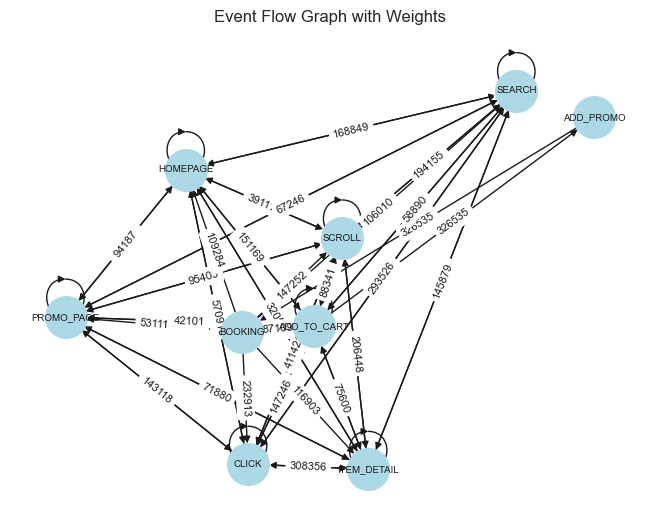

In [ ]:
pos = nx.spring_layout(G)  # You can choose a different layout algorithm
labels = {event: event for event in G.nodes()}

# Extract edge weights to use as labels
edge_labels = {(edge[0], edge[1]): weight for edge, weight in event_transitions.items()}

# Draw the graph with labels and edge labels
nx.draw(G, pos, with_labels=True, labels=labels, node_size=900, node_color='lightblue', font_size=7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title('Event Flow Graph with Weights')
plt.show()

In [ ]:
df_weights = pd.DataFrame(event_transitions.items(), columns=['Event Transition', 'Weight'])
df_weights

,Event Transition,Weight
0,"(HOMEPAGE, SCROLL)",241178
1,"(SCROLL, HOMEPAGE)",391115
2,"(HOMEPAGE, ADD_TO_CART)",918094
3,"(ADD_TO_CART, BOOKING)",526047
4,"(BOOKING, SEARCH)",106010
5,"(SEARCH, HOMEPAGE)",273639
6,"(HOMEPAGE, ITEM_DETAIL)",200990
7,"(ITEM_DETAIL, SCROLL)",206352
8,"(SCROLL, ITEM_DETAIL)",206448
9,"(ITEM_DETAIL, ITEM_DETAIL)",161761
